Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [45]:
from google.colab import drive

In [46]:
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")

In [48]:
data_dictionary = pd.read_excel("/content/drive/MyDrive/Great Learning/Machine Learning/Election_Data.xlsx")
data_dictionary

,**Data Dictionary**
0,NaN
1,1. vote: Party choice: Conservative or Labour
2,NaN
3,2. age: in years
4,NaN
5,3. economic.cond.national: Assessment of curre...
6,NaN
7,4. economic.cond.household: Assessment of curr...
8,NaN
9,"5. Blair: Assessment of the Labour leader, 1 t..."


In [352]:
df1=pd.read_excel("/content/drive/MyDrive/Great Learning/Machine Learning/Election_Data.xlsx",sheet_name='Election_Dataset_Two Classes')

Data Ingestion:

1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

In [50]:
df1.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [353]:
df1=df1.drop(["Unnamed: 0"],axis=1)

In [354]:
df1.shape

(1525, 9)

In [355]:
print("The no. of rows: ",df1.shape[0], "\n""The no. of columns: ",df1.shape[1])

The no. of rows:  1525 
The no. of columns:  9


In [356]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [357]:
df1.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [358]:
df1.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [359]:
cat=[]
num=[]
for i in df1.columns:
    if df1[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [360]:
for variable in cat:
    print(variable,":", sum(df1[variable] == '?'))

vote : 0
gender : 0


In [361]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 8


In [362]:
df1[dups]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [363]:
df1.drop_duplicates(inplace=True)

In [364]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [63]:
df1[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [64]:
df1[cat].describe().T

,count,unique,top,freq
vote,1517,2,Labour,1057
gender,1517,2,female,808


In [365]:
for column in df1.columns:
    if df1[column].dtype == 'object':
        print(column.upper(),': ',df1[column].nunique())
        print(df1[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

Univariate Analysis

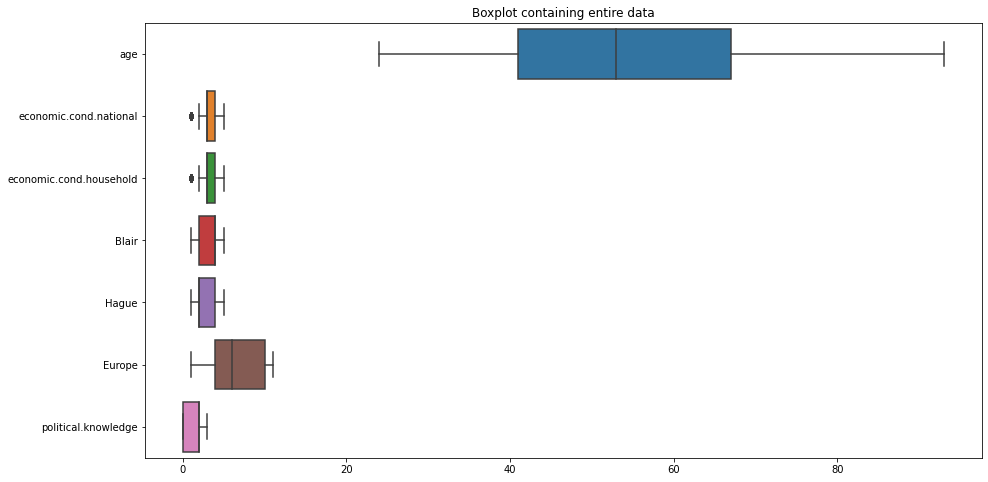

In [66]:
plt.figure(figsize=(15,8))
plt.title("Boxplot containing entire data")
sns.boxplot(data=df1,orient="h");

In [67]:
df1.skew(axis = 0, skipna = True).sort_values(ascending=False)

Hague                      0.146191
age                        0.139800
Europe                    -0.141891
economic.cond.household   -0.144148
economic.cond.national    -0.238474
political.knowledge       -0.422928
Blair                     -0.539514
dtype: float64

In [68]:
def univariateAnalysis_numeric(column,nbins):
    print("\nDescription of " + column)
    print("----------------------------------------------------------------------------")
    print(df1[column].describe(),end=' ')
    print('\n')

In [69]:
df1_num = df1.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df1_num.columns.values)
len(lstnumericcolumns)

7

In [70]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,7)


Description of age
----------------------------------------------------------------------------
count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64 


Description of economic.cond.national
----------------------------------------------------------------------------
count    1517.000000
mean        3.245221
std         0.881792
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64 


Description of economic.cond.household
----------------------------------------------------------------------------
count    1517.000000
mean        3.137772
std         0.931069
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64 


Description of Blair
---------------------

Interquartile range (IQR) of age is  26.0
Lower limit in age:  2.0
Upper limit in age:  106.0




Text(0.5, 1.0, 'Histogram of age')

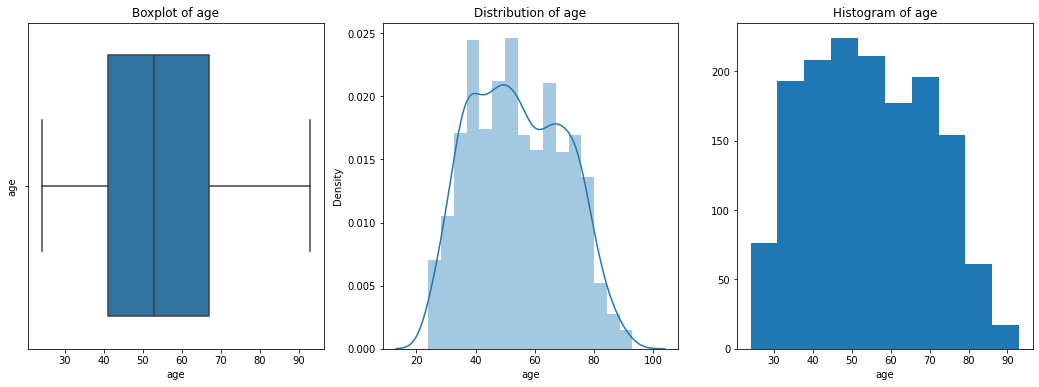

In [366]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df1['age'].quantile(q=0.25)
Q3=df1['age'].quantile(q=0.75)
print('Interquartile range (IQR) of age is ', stats.iqr(df1['age']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in age: ', L_outliers)
print('Upper limit in age: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='age',data=df1,orient='v',ax=ax1);
ax1.set_ylabel('age')
ax1.set_title('Boxplot of age')

#distplot
sns.distplot(df1['age'],ax=ax2);
ax2.set_xlabel('age')
ax2.set_title('Distribution of age')

#histogram
ax3.hist(df1['age']);
ax3.set_xlabel('age')
ax3.set_title('Histogram of age')

Interquartile range (IQR) of economic.cond.national is  1.0
Lower limit in economic.cond.national:  1.5
Upper limit in economic.cond.national:  5.5




Text(0.5, 1.0, 'Histogram of economic.cond.national')

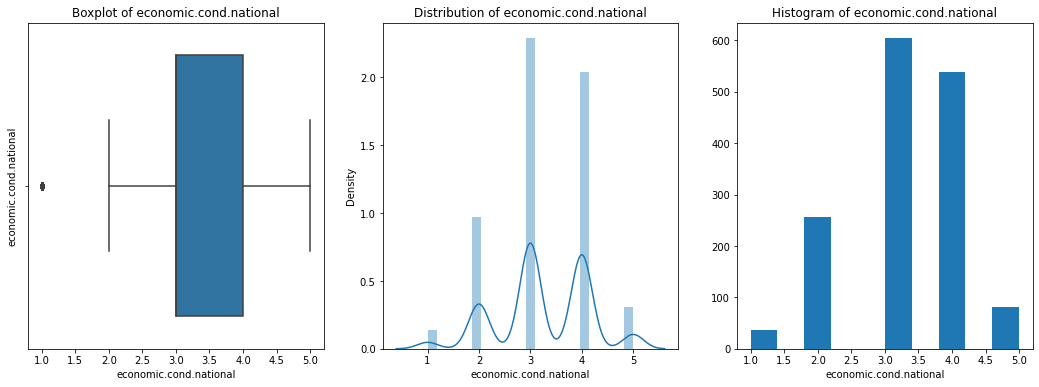

In [367]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df1['economic.cond.national'].quantile(q=0.25)
Q3=df1['economic.cond.national'].quantile(q=0.75)
print('Interquartile range (IQR) of economic.cond.national is ', stats.iqr(df1['economic.cond.national']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in economic.cond.national: ', L_outliers)
print('Upper limit in economic.cond.national: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='economic.cond.national',data=df1,orient='v',ax=ax1);
ax1.set_ylabel('economic.cond.national')
ax1.set_title('Boxplot of economic.cond.national')

#distplot
sns.distplot(df1['economic.cond.national'],ax=ax2);
ax2.set_xlabel('economic.cond.national')
ax2.set_title('Distribution of economic.cond.national')

#histogram
ax3.hist(df1['economic.cond.national']);
ax3.set_xlabel('economic.cond.national')
ax3.set_title('Histogram of economic.cond.national')

Interquartile range (IQR) of economic.cond.household is  1.0
Lower limit in economic.cond.household:  1.5
Upper limit in economic.cond.household:  5.5




Text(0.5, 1.0, 'Histogram of economic.cond.household')

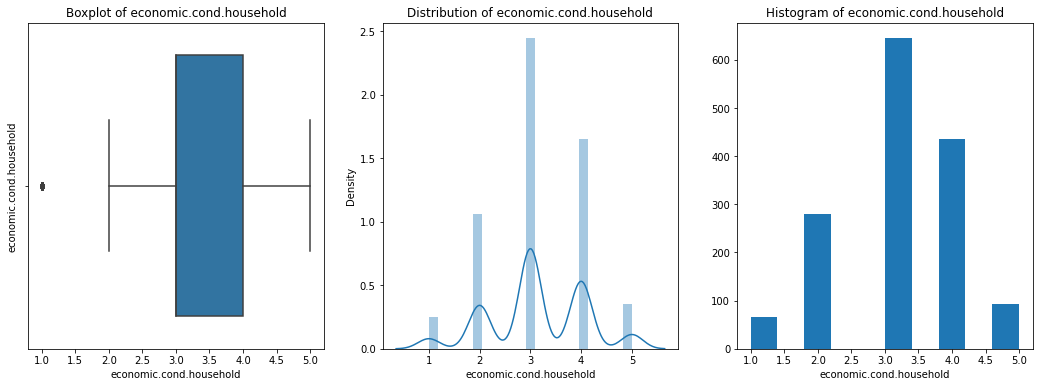

In [368]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df1['economic.cond.household'].quantile(q=0.25)
Q3=df1['economic.cond.household'].quantile(q=0.75)
print('Interquartile range (IQR) of economic.cond.household is ', stats.iqr(df1['economic.cond.household']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in economic.cond.household: ', L_outliers)
print('Upper limit in economic.cond.household: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='economic.cond.household',data=df1,orient='v',ax=ax1);
ax1.set_ylabel('economic.cond.household')
ax1.set_title('Boxplot of economic.cond.household')

#distplot
sns.distplot(df1['economic.cond.household'],ax=ax2);
ax2.set_xlabel('economic.cond.household')
ax2.set_title('Distribution of economic.cond.household')

#histogram
ax3.hist(df1['economic.cond.household']);
ax3.set_xlabel('economic.cond.household')
ax3.set_title('Histogram of economic.cond.household')

Interquartile range (IQR) of Blair is  2.0
Lower limit in Blair:  -1.0
Upper limit in Blair:  7.0




Text(0.5, 1.0, 'Histogram of Blair')

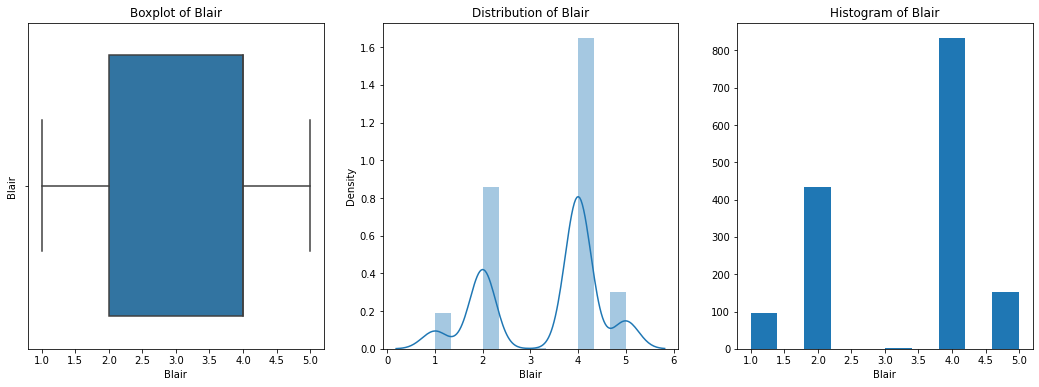

In [369]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df1['Blair'].quantile(q=0.25)
Q3=df1['Blair'].quantile(q=0.75)
print('Interquartile range (IQR) of Blair is ', stats.iqr(df1['Blair']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in Blair: ', L_outliers)
print('Upper limit in Blair: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='Blair',data=df1,orient='v',ax=ax1);
ax1.set_ylabel('Blair')
ax1.set_title('Boxplot of Blair')

#distplot
sns.distplot(df1['Blair'],ax=ax2);
ax2.set_xlabel('Blair')
ax2.set_title('Distribution of Blair')

#histogram
ax3.hist(df1['Blair']);
ax3.set_xlabel('Blair')
ax3.set_title('Histogram of Blair')

Interquartile range (IQR) of Hague is  2.0
Lower limit in Hague:  -1.0
Upper limit in Hague:  7.0




Text(0.5, 1.0, 'Histogram of Hague')

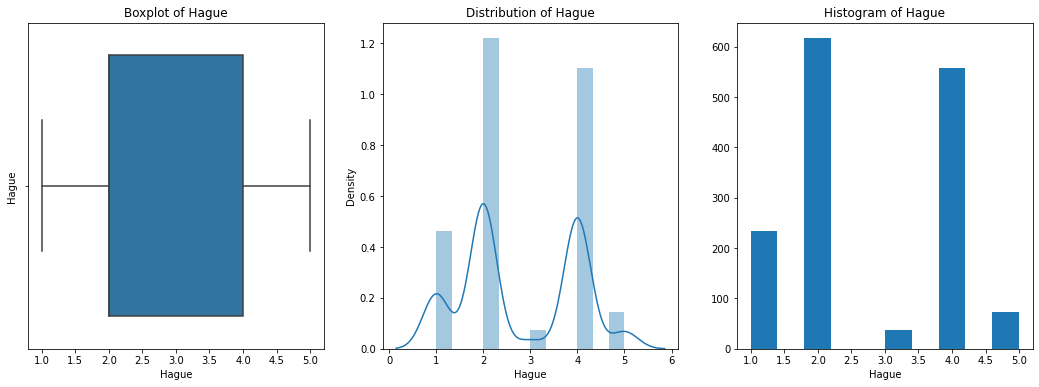

In [370]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df1['Hague'].quantile(q=0.25)
Q3=df1['Hague'].quantile(q=0.75)
print('Interquartile range (IQR) of Hague is ', stats.iqr(df1['Hague']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in Hague: ', L_outliers)
print('Upper limit in Hague: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='Hague',data=df1,orient='v',ax=ax1);
ax1.set_ylabel('Hague')
ax1.set_title('Boxplot of Hague')

#distplot
sns.distplot(df1['Hague'],ax=ax2);
ax2.set_xlabel('Hague')
ax2.set_title('Distribution of Hague')

#histogram
ax3.hist(df1['Hague']);
ax3.set_xlabel('Hague')
ax3.set_title('Histogram of Hague')

Interquartile range (IQR) of Europe is  6.0
Lower limit in Europe:  -5.0
Upper limit in Europe:  19.0




Text(0.5, 1.0, 'Histogram of Europe')

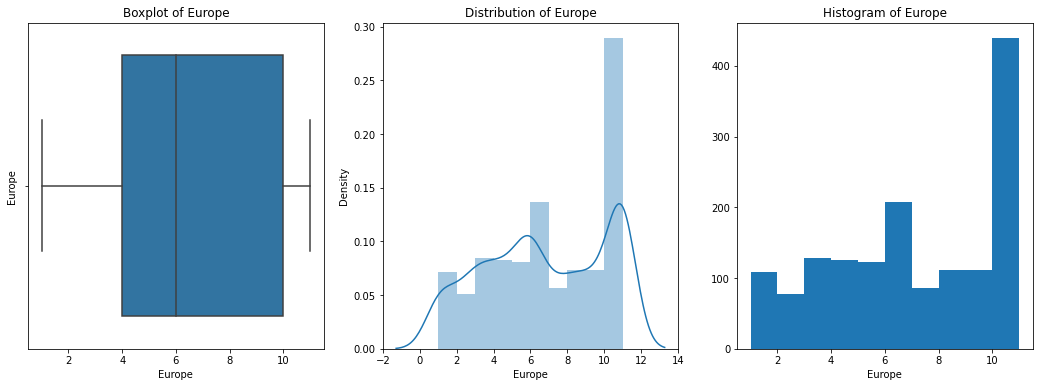

In [371]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df1['Europe'].quantile(q=0.25)
Q3=df1['Europe'].quantile(q=0.75)
print('Interquartile range (IQR) of Europe is ', stats.iqr(df1['Europe']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in Europe: ', L_outliers)
print('Upper limit in Europe: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='Europe',data=df1,orient='v',ax=ax1);
ax1.set_ylabel('Europe')
ax1.set_title('Boxplot of Europe')

#distplot
sns.distplot(df1['Europe'],ax=ax2);
ax2.set_xlabel('Europe')
ax2.set_title('Distribution of Europe')

#histogram
ax3.hist(df1['Europe']);
ax3.set_xlabel('Europe')
ax3.set_title('Histogram of Europe')

Interquartile range (IQR) of political.knowledge is  2.0
Lower limit in political.knowledge:  -3.0
Upper limit in political.knowledge:  5.0




Text(0.5, 1.0, 'Histogram of political.knowledge')

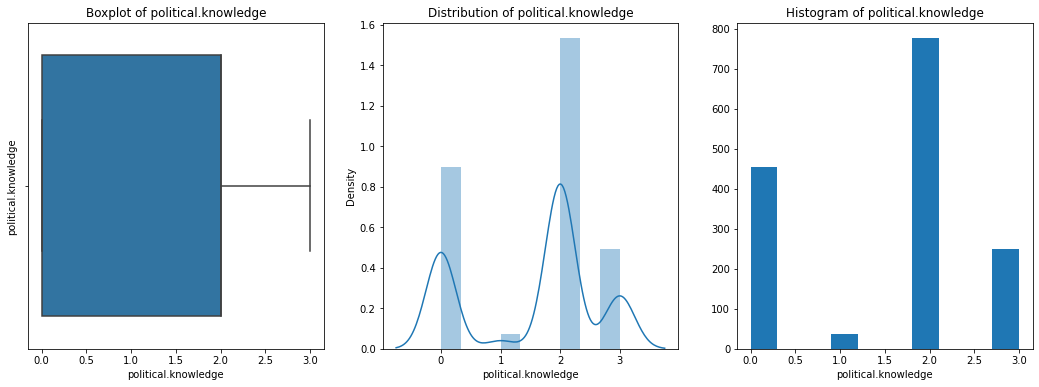

In [372]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df1['political.knowledge'].quantile(q=0.25)
Q3=df1['political.knowledge'].quantile(q=0.75)
print('Interquartile range (IQR) of political.knowledge is ', stats.iqr(df1['political.knowledge']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in political.knowledge: ', L_outliers)
print('Upper limit in political.knowledge: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='political.knowledge',data=df1,orient='v',ax=ax1);
ax1.set_ylabel('political.knowledge')
ax1.set_title('Boxplot of political.knowledge')

#distplot
sns.distplot(df1['political.knowledge'],ax=ax2);
ax2.set_xlabel('political.knowledge')
ax2.set_title('Distribution of political.knowledge')

#histogram
ax3.hist(df1['political.knowledge']);
ax3.set_xlabel('political.knowledge')
ax3.set_title('Histogram of political.knowledge')

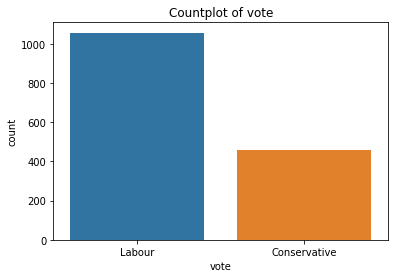

In [78]:
plt.title('Countplot of vote')
sns.countplot(data = df1, x = 'vote')

Text(0.5, 0, 'Pie chart of Vote')

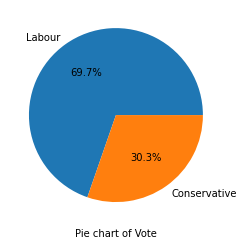

In [79]:
plt.pie(df1['vote'].value_counts(),labels=df1['vote'].value_counts().index,autopct='%1.1f%%')
plt.xlabel('Pie chart of Vote')

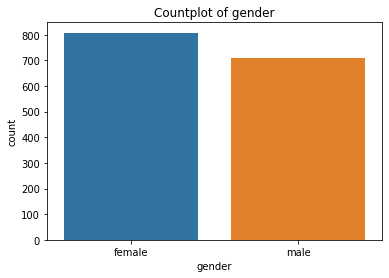

In [80]:
plt.title('Countplot of gender')
sns.countplot(data = df1, x = 'gender')

Text(0.5, 0, 'Pie chart of Gender')

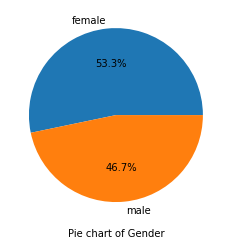

In [81]:
plt.pie(df1['gender'].value_counts(),labels=df1['gender'].value_counts().index,autopct='%1.1f%%')
plt.xlabel('Pie chart of Gender')

Bivariate Analysis

In [82]:
corr = df1_num.corr(method='pearson')
corr

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


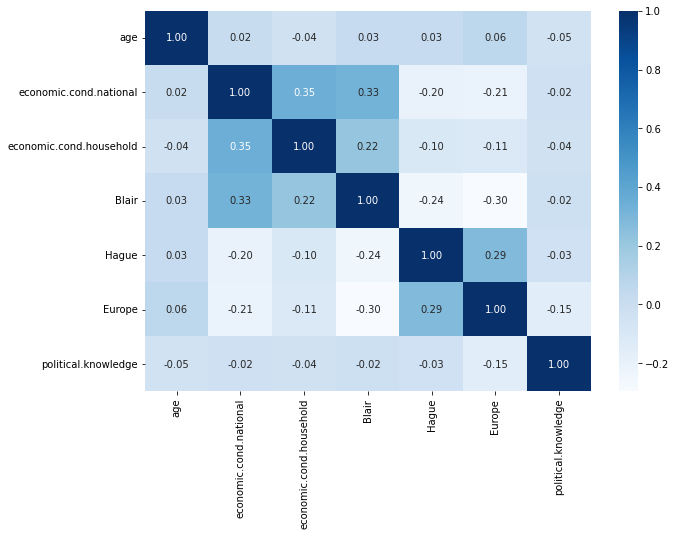

In [83]:
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt = '.2f', cmap="Blues")

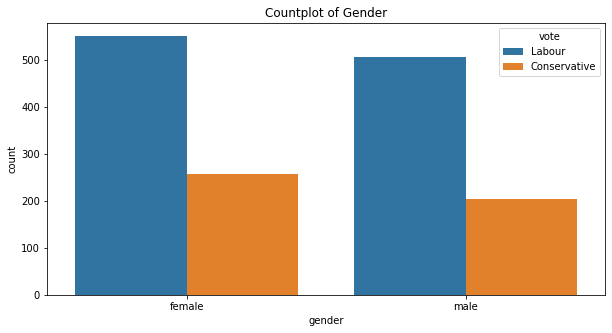

In [84]:
plt.figure(figsize=(10,5))
plt.title('Countplot of Gender')
sns.countplot(x='gender',hue='vote',data=df1)

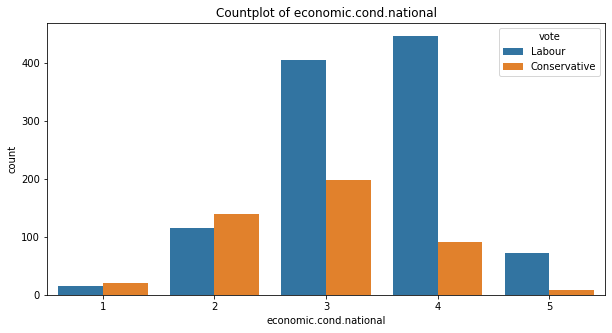

In [373]:
plt.figure(figsize=(10,5))
plt.title('Countplot of economic.cond.national')
sns.countplot(x='economic.cond.national',hue='vote',data=df1)

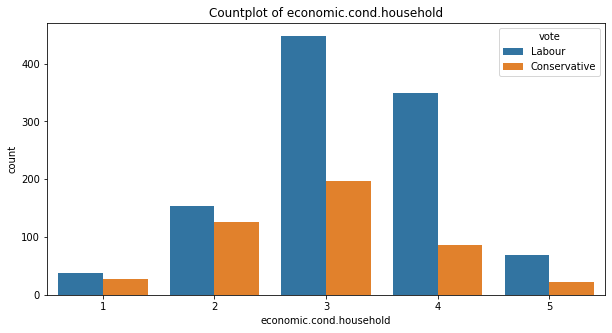

In [374]:
plt.figure(figsize=(10,5))
plt.title('Countplot of economic.cond.household')
sns.countplot(x='economic.cond.household',hue='vote',data=df1)

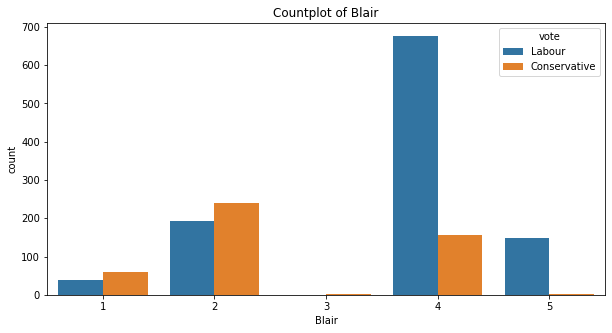

In [375]:
plt.figure(figsize=(10,5))
plt.title('Countplot of Blair')
sns.countplot(x='Blair',hue='vote',data=df1)

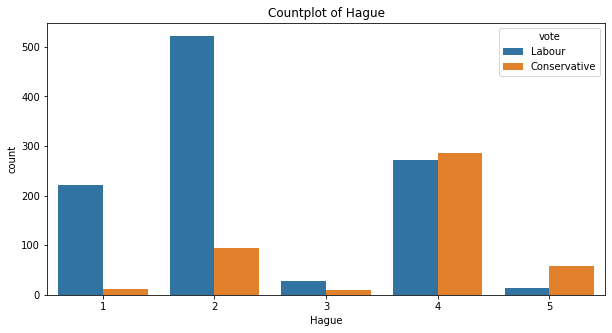

In [378]:
plt.figure(figsize=(10,5))
plt.title('Countplot of Hague')
sns.countplot(x='Hague',hue='vote',data=df1)

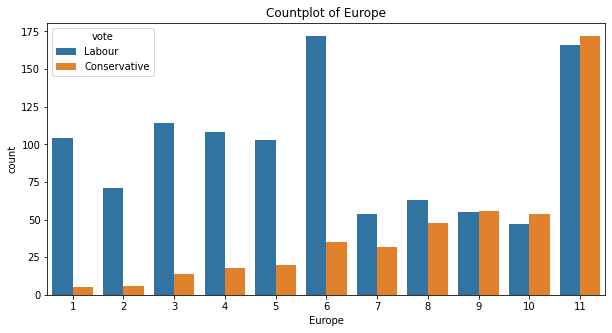

In [376]:
plt.figure(figsize=(10,5))
plt.title('Countplot of Europe')
sns.countplot(x='Europe',hue='vote',data=df1)

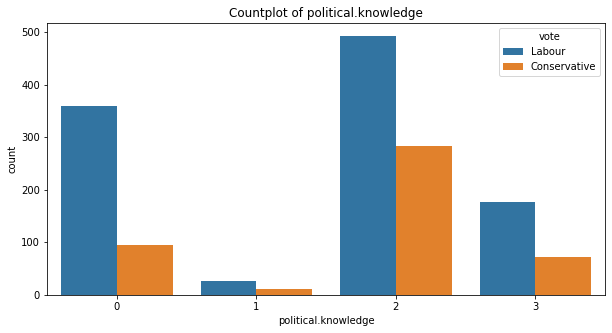

In [379]:
plt.figure(figsize=(10,5))
plt.title('Countplot of political.knowledge')
sns.countplot(x='political.knowledge',hue='vote',data=df1)

Multivariate Analysis

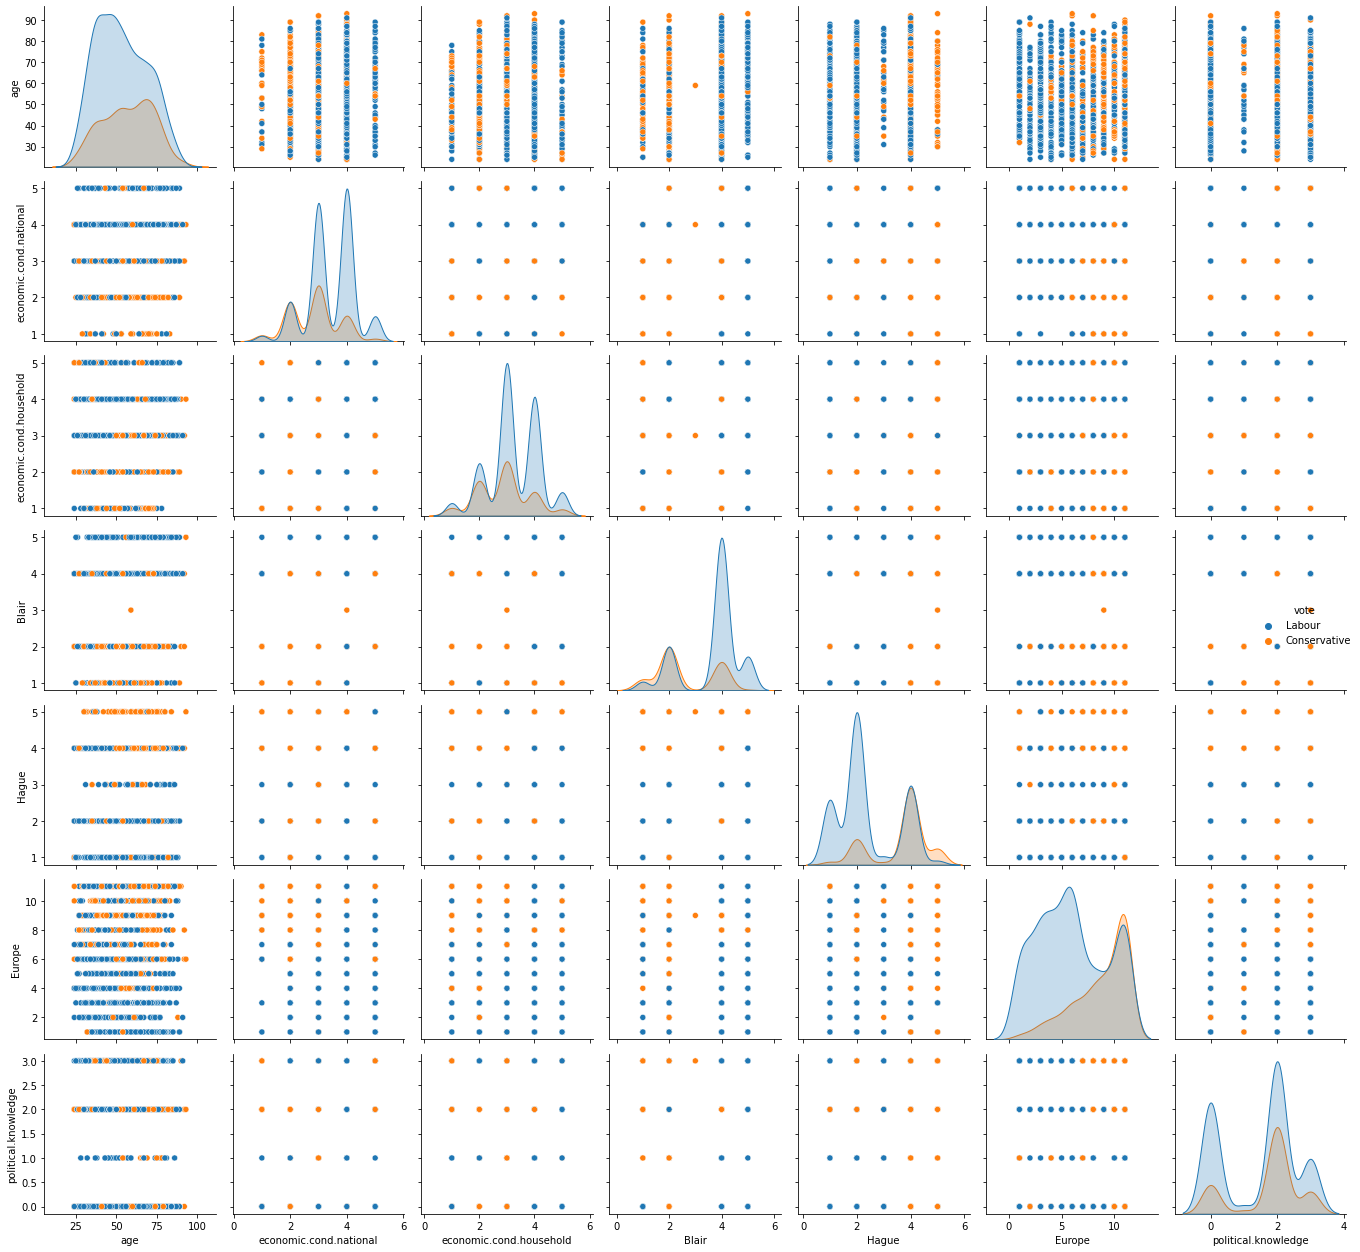

In [85]:
sns.pairplot(df1, diag_kind='kde', hue='vote')
plt.tight_layout()

Data Preparation: 

1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

In [86]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print(feature)
        print(df1[feature].value_counts())
        print('\n')

vote
Labour          1057
Conservative     460
Name: vote, dtype: int64


gender
female    808
male      709
Name: gender, dtype: int64




In [87]:
count_labour = len(df1[df1['vote']=='Labour'])
count_conservative = len(df1[df1['vote']=='Conservative'])
pct_labour = count_labour / (count_labour + count_conservative)
print ('Percentage of votes for labour is', pct_labour*100)
pct_conservative = count_conservative / (count_labour + count_conservative)
print ('Percentage of votes for conservative is', pct_conservative*100)

Percentage of votes for labour is 69.67699406723797
Percentage of votes for conservative is 30.323005932762033


In [88]:
for col in df1.columns:
  if df1[col].dtype == 'object':
    print('\n')
    print('Column Name:', col)
    print(pd.Categorical(df1[col].unique()))
    print(pd.Categorical(df1[col].unique()).codes)
    df1[col] = pd.Categorical(df1[col]).codes



Column Name: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


Column Name: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [89]:
df1['vote'].value_counts().sort_values()

0     460
1    1057
Name: vote, dtype: int64

In [90]:
df1['gender'].value_counts().sort_values()

1    709
0    808
Name: gender, dtype: int64

In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int8 
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 130.1 KB


In [92]:
df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [93]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [94]:
scaler = MinMaxScaler().fit(df1)
df1_scaled = scaler.transform(df1)
df1_scaled = pd.DataFrame(df1_scaled,columns = df1.columns)
df1_scaled.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1.0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0.0
1,1.0,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1.0
2,1.0,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1.0
3,1.0,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0.0
4,1.0,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1.0


In [95]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
vote,1517.0,0.696770,0.459805,0.0,0.0,1.0,1.0,1.0
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0
gender,1517.0,0.467370,0.499099,0.0,0.0,0.0,1.0,1.0


In [96]:
df1_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
vote,1517.0,0.696770,0.459805,0.0,0.000000,1.000000,1.000000,1.0
age,1517.0,0.438279,0.227561,0.0,0.246377,0.420290,0.623188,1.0
economic.cond.national,1517.0,0.561305,0.220448,0.0,0.500000,0.500000,0.750000,1.0
economic.cond.household,1517.0,0.534443,0.232767,0.0,0.500000,0.500000,0.750000,1.0
Blair,1517.0,0.583883,0.293693,0.0,0.250000,0.750000,0.750000,1.0
Hague,1517.0,0.437376,0.308120,0.0,0.250000,0.250000,0.750000,1.0
Europe,1517.0,0.574028,0.329904,0.0,0.300000,0.500000,0.900000,1.0
political.knowledge,1517.0,0.513514,0.361472,0.0,0.000000,0.666667,0.666667,1.0
gender,1517.0,0.467370,0.499099,0.0,0.000000,0.000000,1.000000,1.0


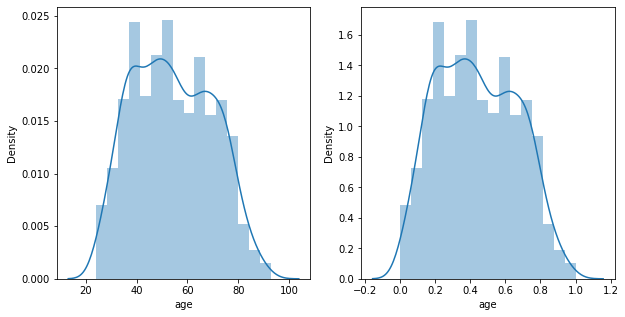

In [97]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10, 5)
sns.distplot(df1['age'] , ax=axes[0])
sns.distplot(df1_scaled['age'] , ax=axes[1])

In [98]:
X = df1.drop('vote', axis=1)
y = df1['vote']

In [99]:
X_scaled = df1_scaled.drop('vote', axis=1)
y_scaled = df1_scaled['vote']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=df1['vote'])

In [101]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=.30, random_state=1, stratify=df1_scaled['vote'])

In [102]:
print('Shape of the data after splitting into train and test set:')
print('The training set for the independent variables: ', X_train.shape)
print('The training set for the dependent variables: ', y_train.shape)
print('The test set for the independent variables: ', X_test.shape)
print('The test set for the independent variables: ', y_test.shape)

Shape of the data after splitting into train and test set:
The training set for the independent variables:  (1061, 8)
The training set for the dependent variables:  (1061,)
The test set for the independent variables:  (456, 8)
The test set for the independent variables:  (456,)


In [103]:
print('Shape of the scaled data after splitting into train and test set:')
print('The training set for the independent variables: ', X_train_scaled.shape)
print('The training set for the dependent variables: ', y_train_scaled.shape)
print('The test set for the independent variables: ', X_test_scaled.shape)
print('The test set for the independent variables: ', y_test_scaled.shape)

Shape of the scaled data after splitting into train and test set:
The training set for the independent variables:  (1061, 8)
The training set for the dependent variables:  (1061,)
The test set for the independent variables:  (456, 8)
The test set for the independent variables:  (456,)


Modeling:

1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

Logistic Regression

Scaled data

In [105]:
X_scaled = df1_scaled.drop('vote', axis=1)
y_scaled = df1_scaled['vote']

In [106]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=.30, random_state=1, stratify=df1_scaled['vote'])

In [107]:
logistic_model_scaled = LogisticRegression()
logistic_model_scaled.fit(X_train_scaled, y_train_scaled)
logistic_model_scaled

LogisticRegression()

In [108]:
ytrain_predict_logistic_scaled = logistic_model_scaled.predict(X_train_scaled)
ytest_predict_logistic_scaled = logistic_model_scaled.predict(X_test_scaled)

In [109]:
ytest_predict_prob_log_scaled = logistic_model_scaled.predict_proba(X_test_scaled)
pd.DataFrame(ytest_predict_prob_log_scaled).head()

,0,1
0,0.210394,0.789606
1,0.594851,0.405149
2,0.099074,0.900926
3,0.039439,0.960561
4,0.146980,0.853020


In [110]:
for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, logistic_model_scaled.coef_[0][idx]))

The coefficient for age is -0.7903221488607813
The coefficient for economic.cond.national is 1.2337023026824006
The coefficient for economic.cond.household is 0.2149836880594536
The coefficient for Blair is 2.0346165222945265
The coefficient for Hague is -3.1396480610520476
The coefficient for Europe is -1.9395312052131357
The coefficient for political.knowledge is -1.1085432893972533
The coefficient for gender is 0.05142306794067121


Linear Discriminant Analysis

Un-scaled data

In [115]:
X = df1.drop('vote', axis=1)
y = df1['vote']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=df1['vote'])

In [117]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_model

LinearDiscriminantAnalysis()

In [118]:
ytrain_predict_lda = lda_model.predict(X_train)
ytest_predict_lda = lda_model.predict(X_test)

In [119]:
ytest_predict_prob_lda = lda_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_lda).head()

,0,1
0,0.165344,0.834656
1,0.658755,0.341245
2,0.075012,0.924988
3,0.019620,0.980380
4,0.118369,0.881631


In [120]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lda_model.coef_[0][idx]))

The coefficient for age is -0.01746970214807133
The coefficient for economic.cond.national is 0.3642421502609687
The coefficient for economic.cond.household is 0.030375855682562465
The coefficient for Blair is 0.6876644808984674
The coefficient for Hague is -0.9748271902481128
The coefficient for Europe is -0.22179228698813155
The coefficient for political.knowledge is -0.48344559454795843
The coefficient for gender is 0.015967511560797887


1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)

In [121]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

KNN Model

Scaled data

In [122]:
X_scaled = df1_scaled.drop('vote', axis=1)
y_scaled = df1_scaled['vote']

In [123]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=.30, random_state=1, stratify=df1_scaled['vote'])

In [124]:
knn_model_scaled=KNeighborsClassifier()
knn_model_scaled.fit(X_train_scaled,y_train_scaled)
knn_model_scaled

KNeighborsClassifier()

In [125]:
ytrain_predict_knn_scaled = knn_model_scaled.predict(X_train_scaled)
ytest_predict_knn_scaled = knn_model_scaled.predict(X_test_scaled)

In [126]:
ytest_predict_prob_knn_scaled = knn_model_scaled.predict_proba(X_test_scaled)
pd.DataFrame(ytest_predict_prob_knn_scaled).head()

,0,1
0,0.0,1.0
1,0.6,0.4
2,0.2,0.8
3,0.0,1.0
4,0.0,1.0


Naive Bayes Model

Un-scaled data

In [127]:
X = df1.drop('vote', axis=1)
y = df1['vote']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df1['vote'])

In [129]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_model

GaussianNB()

In [130]:
ytrain_predict_nb = nb_model.predict(X_train)
ytest_predict_nb = nb_model.predict(X_test)

In [131]:
ytest_predict_prob_nb = nb_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_nb).head()

,0,1
0,0.223760,0.776240
1,0.855810,0.144190
2,0.037077,0.962923
3,0.011024,0.988976
4,0.043305,0.956695


1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)

Model tuning

Applying GridSearchCV for Logistic Regression - scaled

In [132]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [133]:
param_grid_logistic = {
    'penalty': ['l2','none'],
    'solver': ['sag','lbfgs','liblinear','saga'],
    'tol': [0.0001,0.00001]
}

logistic = LogisticRegression(max_iter=10000,n_jobs=2)

grid_search_logistic = GridSearchCV(estimator = logistic, param_grid = param_grid_logistic, cv = 3,n_jobs=-1,scoring='f1')

In [134]:
grid_search_logistic.fit(X_train_scaled, y_train_scaled)
print(grid_search_logistic.best_params_)
best_grid_logistic = grid_search_logistic.best_estimator_
best_grid_logistic

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001}


LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')

In [135]:
ytrain_predict_logistic_grid = best_grid_logistic.predict(X_train_scaled)
ytest_predict_logistic_grid = best_grid_logistic.predict(X_test_scaled)

In [136]:
ytest_predict_logistic_prob=best_grid_logistic.predict_proba(X_test_scaled)
pd.DataFrame(ytest_predict_logistic_prob).head()

,0,1
0,0.210392,0.789608
1,0.594852,0.405148
2,0.099084,0.900916
3,0.039443,0.960557
4,0.146994,0.853006


In [137]:
for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, best_grid_logistic.coef_[0][idx]))

The coefficient for age is -0.7902411377178716
The coefficient for economic.cond.national is 1.2335969498213022
The coefficient for economic.cond.household is 0.2148944128302168
The coefficient for Blair is 2.0345274528782333
The coefficient for Hague is -3.1395984696193278
The coefficient for Europe is -1.9395518211886413
The coefficient for political.knowledge is -1.1084740922860612
The coefficient for gender is 0.051303423573302046


Applying Grid Search CV for Linear Discriminant Analysis

In [340]:
param_grid_lda = {
    'solver': ['svd','lsqr','eigen'],
    'tol': [0.001,0.0001,0.00001]
}

lda = LinearDiscriminantAnalysis()

grid_search_lda = GridSearchCV(estimator = lda, param_grid = param_grid_lda, cv = 3,n_jobs=-1,scoring='accuracy')

In [341]:
grid_search_lda.fit(X_train, y_train)
print(grid_search_lda.best_params_)
best_grid_lda = grid_search_lda.best_estimator_
best_grid_lda

{'solver': 'lsqr', 'tol': 0.001}


LinearDiscriminantAnalysis(solver='lsqr', tol=0.001)

In [342]:
ytrain_predict_lda_grid = best_grid_lda.predict(X_train)
ytest_predict_lda_grid = best_grid_lda.predict(X_test)

In [343]:
ytest_predict_lda_prob=best_grid_logistic.predict_proba(X_test)
pd.DataFrame(ytest_predict_lda_prob).head()

,0,1
0,1.0,4.722276e-31
1,1.0,8.472707e-18
2,1.0,1.336308e-15
3,1.0,8.065228e-14
4,1.0,7.758117e-18


In [344]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, best_grid_lda.coef_[0][idx]))

The coefficient for age is -0.017502694975546546
The coefficient for economic.cond.national is 0.3649300485617415
The coefficient for economic.cond.household is 0.030433222737677124
The coefficient for Blair is 0.688963186244828
The coefficient for Hague is -0.9766682236574593
The coefficient for Europe is -0.2222111581628008
The coefficient for political.knowledge is -0.48435861738940567
The coefficient for gender is 0.01599766738999764


KNN Model - Different values for K

In [174]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_scaled)
    # evaluate test accuracy
    scores = knn.score(X_test_scaled, y_test_scaled)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2171052631578947,
 0.16885964912280704,
 0.1557017543859649,
 0.1600877192982456,
 0.14912280701754388,
 0.13815789473684215,
 0.14912280701754388,
 0.14692982456140347,
 0.14473684210526316,
 0.13815789473684215]

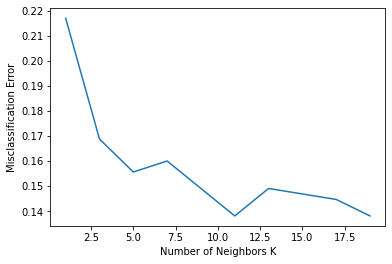

In [175]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [176]:
knn_model_best = KNeighborsClassifier(n_neighbors=11)
knn_model_best.fit(X_train_scaled,y_train_scaled)
knn_model_best

KNeighborsClassifier(n_neighbors=11)

In [177]:
ytrain_predict_knn_best = knn_model_best.predict(X_train_scaled)
ytest_predict_knn_best = knn_model_best.predict(X_test_scaled)

In [178]:
ytest_predict_prob_knn_best = knn_model_best.predict_proba(X_test_scaled)
pd.DataFrame(ytest_predict_prob_knn_best).head()

,0,1
0,0.181818,0.818182
1,0.545455,0.454545
2,0.272727,0.727273
3,0.000000,1.000000
4,0.090909,0.909091


Ada Boosting

In [221]:
X_scaled = df1_scaled.drop('vote', axis=1)
y_scaled = df1_scaled['vote']

In [222]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=.30, random_state=1, stratify=df1_scaled['vote'])

In [223]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train_scaled,y_train_scaled)
ADB_model

AdaBoostClassifier(n_estimators=100, random_state=1)

In [224]:
ytrain_predict_adb = ADB_model.predict(X_train_scaled)
ytest_predict_adb = ADB_model.predict(X_test_scaled)

In [189]:
ytest_predict_prob_adb = ADB_model.predict_proba(X_test_scaled)
pd.DataFrame(ytest_predict_prob_adb).head()

,0,1
0,0.496860,0.503140
1,0.501533,0.498467
2,0.494642,0.505358
3,0.492612,0.507388
4,0.494468,0.505532


Gradient Boosting

In [194]:
X_scaled = df1_scaled.drop('vote', axis=1)
y_scaled = df1_scaled['vote']

In [195]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=.30, random_state=1, stratify=df1_scaled['vote'])

In [196]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl_model = GradientBoostingClassifier(random_state=1)
gbcl_model = gbcl_model.fit(X_train_scaled, y_train_scaled)
gbcl_model

GradientBoostingClassifier(random_state=1)

In [197]:
ytrain_predict_gbcl = gbcl_model.predict(X_train_scaled)
ytest_predict_gbcl = gbcl_model.predict(X_test_scaled)

In [198]:
ytest_predict_prob_gbcl = gbcl_model.predict_proba(X_test_scaled)
pd.DataFrame(ytest_predict_prob_gbcl).head()

,0,1
0,0.294422,0.705578
1,0.524644,0.475356
2,0.052013,0.947987
3,0.037119,0.962881
4,0.212453,0.787547


Random Forest

In [199]:
X_scaled = df1_scaled.drop('vote', axis=1)
y_scaled = df1_scaled['vote']

In [200]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=.30, random_state=1, stratify=df1_scaled['vote'])

In [201]:
from sklearn.ensemble import RandomForestClassifier
rfcl_model=RandomForestClassifier(max_features= 4, n_estimators=100,random_state=1)
rfcl_model.fit(X_train_scaled, y_train_scaled)
rfcl_model

RandomForestClassifier(max_features=4, random_state=1)

In [202]:
ytrain_predict_rfcl = rfcl_model.predict(X_train_scaled)
ytest_predict_rfcl = rfcl_model.predict(X_test_scaled)

In [203]:
ytest_predict_prob_rfcl = rfcl_model.predict_proba(X_test_scaled)
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.34,0.66
1,0.57,0.43
2,0.13,0.87
3,0.06,0.94
4,0.24,0.76


Bagging

In [204]:
X_scaled = df1_scaled.drop('vote', axis=1)
y_scaled = df1_scaled['vote']

In [205]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=.30, random_state=1, stratify=df1_scaled['vote'])

In [206]:
from sklearn.ensemble import BaggingClassifier
rfcl = RandomForestClassifier()
bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=100,random_state=1)
bagging_model.fit(X_train_scaled, y_train_scaled)
bagging_model

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [207]:
ytrain_predict_bagging = bagging_model.predict(X_train_scaled)
ytest_predict_bagging = bagging_model.predict(X_test_scaled)

In [208]:
ytest_predict_prob_bagging = bagging_model.predict_proba(X_test_scaled)
pd.DataFrame(ytest_predict_prob_bagging).head()

,0,1
0,0.3256,0.6744
1,0.5406,0.4594
2,0.2070,0.7930
3,0.0642,0.9358
4,0.2333,0.7667


1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

Logistic Regression

Training Data

In [144]:
logistic_train_acc = logistic_model_scaled.score(X_train_scaled, y_train_scaled)
print("The accuracy of the model is {}".format(logistic_train_acc))

The accuracy of the model is 0.8265786993402451


In [145]:
logistic_intercept = logistic_model_scaled.intercept_[0]
print("The intercept for the model is {}".format(logistic_intercept))

The intercept for the model is 2.643450929564173


AUC and ROC for the training data

AUC: 0.877


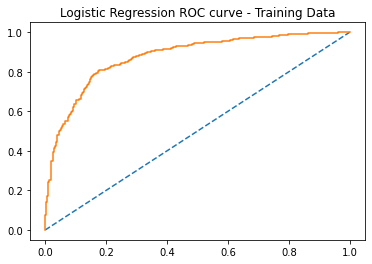

In [146]:
probs_logistic = logistic_model_scaled.predict_proba(X_train_scaled)
probs_logistic = probs_logistic[:, 1]
auc_train_logistic = roc_auc_score(y_train_scaled, probs_logistic)
print('AUC: %.3f' % auc_train_logistic)
logistic_train_fpr, logistic_train_tpr, logistic_train_thresholds = roc_curve(y_train_scaled, probs_logistic)
plt.title('Logistic Regression ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_train_fpr, logistic_train_tpr)
plt.show()

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix - Training Data')

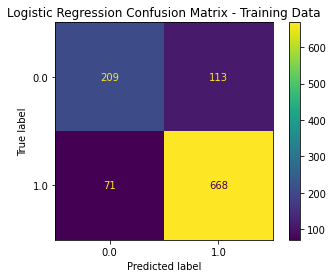

In [150]:
plot_confusion_matrix(logistic_model_scaled,X_train_scaled,y_train_scaled);
plt.title('Logistic Regression Confusion Matrix - Training Data')

In [151]:
print(classification_report(y_train_scaled, ytrain_predict_logistic_scaled))

              precision    recall  f1-score   support

         0.0       0.75      0.65      0.69       322
         1.0       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



Test Data

In [152]:
logistic_test_acc = logistic_model_scaled.score(X_test_scaled, y_test_scaled)
print("The accuracy of the model is {}".format(logistic_test_acc))

The accuracy of the model is 0.8508771929824561


AUC and ROC for the test data

AUC: 0.913


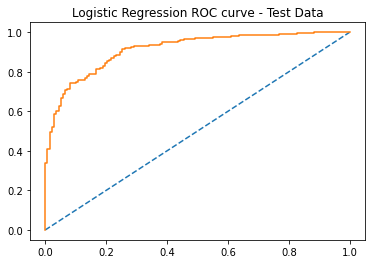

In [69]:
probs_logistic = logistic_model_scaled.predict_proba(X_test_scaled)
probs_logistic = probs_logistic[:, 1]
auc_test_logistic = roc_auc_score(y_test, probs_logistic)
print('AUC: %.3f' % auc_test_logistic)
logistic_test_fpr, logistic_test_tpr, logistic_test_thresholds = roc_curve(y_test_scaled, probs_logistic)
plt.title('Logistic Regression ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_test_fpr, logistic_test_tpr)
plt.show()

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix - Test Data')

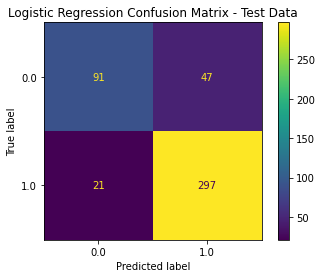

In [153]:
plot_confusion_matrix(logistic_model_scaled,X_test_scaled,y_test_scaled);
plt.title('Logistic Regression Confusion Matrix - Test Data')

In [70]:
print(classification_report(y_test_scaled, ytest_predict_logistic_scaled))

              precision    recall  f1-score   support

         0.0       0.81      0.66      0.73       138
         1.0       0.86      0.93      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.80      0.81       456
weighted avg       0.85      0.85      0.85       456



Logistic Regression - Grid Search CV

Training Data

In [154]:
logistic_train_acc_grid = best_grid_logistic.score(X_train_scaled, y_train_scaled)
print("The accuracy of the model is {}".format(logistic_train_acc_grid))

The accuracy of the model is 0.8265786993402451


In [287]:
logistic_intercept_grid = best_grid_logistic.intercept_[0]
print("The intercept for the model is {}".format(logistic_intercept_grid))

The intercept for the model is 2.6435537540447815


AUC and ROC for Training data

AUC: 0.877


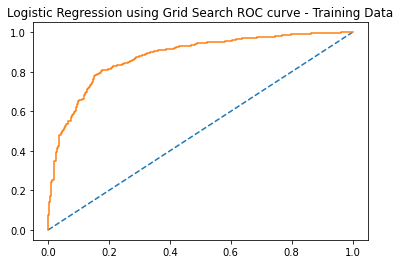

In [288]:
probs_logistic_grid = best_grid_logistic.predict_proba(X_train_scaled)
probs_logistic_grid = probs_logistic_grid[:, 1]
auc_train_logistic_grid = roc_auc_score(y_train_scaled, probs_logistic_grid)
print('AUC: %.3f' % auc_train_logistic_grid)
logistic_train_fpr_grid, logistic_train_tpr_grid, logistic_train_thresholds_grid = roc_curve(y_train_scaled, probs_logistic_grid)
plt.title('Logistic Regression using Grid Search ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_train_fpr_grid, logistic_train_tpr_grid)
plt.show()

Text(0.5, 1.0, 'Logistic Regression using Grid Search Confusion Matrix - Training Data')

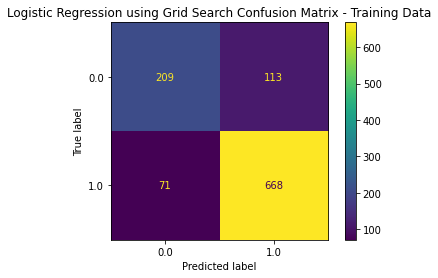

In [289]:
plot_confusion_matrix(best_grid_logistic,X_train_scaled,y_train_scaled);
plt.title('Logistic Regression using Grid Search Confusion Matrix - Training Data')

In [290]:
print(classification_report(y_train_scaled, ytrain_predict_logistic_grid))

              precision    recall  f1-score   support

         0.0       0.75      0.65      0.69       322
         1.0       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



Test Data

In [291]:
logistic_test_acc_grid = best_grid_logistic.score(X_test_scaled, y_test_scaled)
print("The accuracy of the model is {}".format(logistic_test_acc_grid))

The accuracy of the model is 0.8508771929824561


AUC and ROC for the Test Data

AUC: 0.913


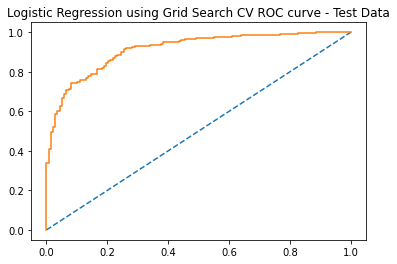

In [292]:
probs_logistic_grid = best_grid_logistic.predict_proba(X_test_scaled)
probs_logistic_grid = probs_logistic_grid[:, 1]
auc_test_logistic_grid = roc_auc_score(y_test, probs_logistic_grid)
print('AUC: %.3f' % auc_test_logistic_grid)
logistic_test_fpr_grid, logistic_test_tpr_grid, logistic_test_thresholds_grid = roc_curve(y_test_scaled, probs_logistic_grid)
plt.title('Logistic Regression using Grid Search CV ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_test_fpr_grid, logistic_test_tpr_grid)
plt.show()

Text(0.5, 1.0, 'Logistic Regression using Grid Search Confusion Matrix - Test Data')

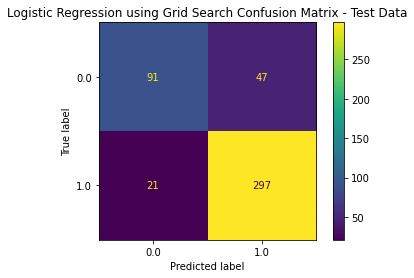

In [293]:
plot_confusion_matrix(best_grid_logistic,X_test_scaled,y_test_scaled);
plt.title('Logistic Regression using Grid Search Confusion Matrix - Test Data')

In [294]:
print(classification_report(y_test_scaled, ytest_predict_logistic_grid))

              precision    recall  f1-score   support

         0.0       0.81      0.66      0.73       138
         1.0       0.86      0.93      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.80      0.81       456
weighted avg       0.85      0.85      0.85       456



Linear Discriminant Analysis

Training Data

In [295]:
lda_train_acc = lda_model.score(X_train, y_train)
print("The accuracy of the model is {}".format(lda_train_acc))

The accuracy of the model is 0.822808671065033


AUC: 0.877


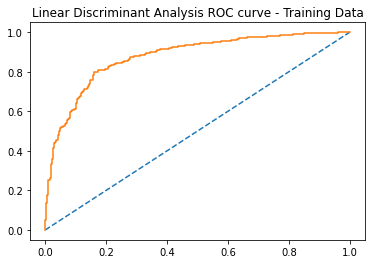

In [296]:
probs_lda = lda_model.predict_proba(X_train)
probs_lda = probs_lda[:, 1]
auc_train_lda = roc_auc_score(y_train, probs_lda)
print('AUC: %.3f' % auc_train_lda)
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs_lda)
plt.title('Linear Discriminant Analysis ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lda_train_fpr, lda_train_tpr)
plt.show()

Text(0.5, 1.0, 'LDA Confusion Matrix - Training Data')

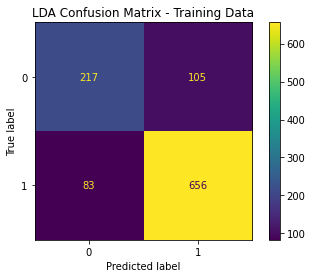

In [297]:
plot_confusion_matrix(lda_model,X_train,y_train);
plt.title('LDA Confusion Matrix - Training Data')

In [298]:
print(classification_report(y_train, ytrain_predict_lda))

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061



Test Data

In [299]:
lda_test_acc = lda_model.score(X_test, y_test)
print("The accuracy of the model is {}".format(lda_test_acc))

The accuracy of the model is 0.8530701754385965


AUC: 0.914


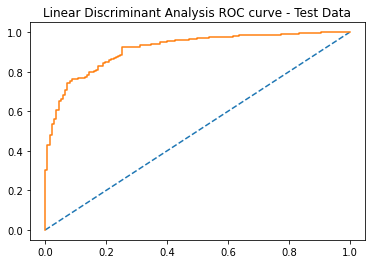

In [300]:
probs_lda = lda_model.predict_proba(X_test)
probs_lda = probs_lda[:, 1]
auc_test_lda = roc_auc_score(y_test, probs_lda)
print('AUC: %.3f' % auc_test_lda)
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs_lda)
plt.title('Linear Discriminant Analysis ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lda_test_fpr, lda_test_tpr)
plt.show()

Text(0.5, 1.0, 'LDA Confusion Matrix - Test Data')

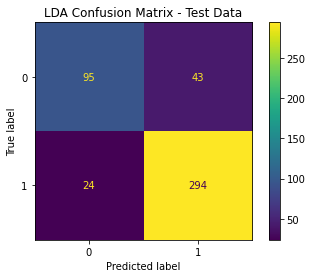

In [301]:
plot_confusion_matrix(lda_model,X_test,y_test);
plt.title('LDA Confusion Matrix - Test Data')

In [302]:
print(classification_report(y_test, ytest_predict_lda))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



Linear Discriminant Analysis - Grid Search CV

Training Data

In [303]:
lda_train_acc_grid = best_grid_lda.score(X_train, y_train)
print("The accuracy of the model is {}".format(lda_train_acc_grid))

The accuracy of the model is 0.822808671065033


AUC: 0.877


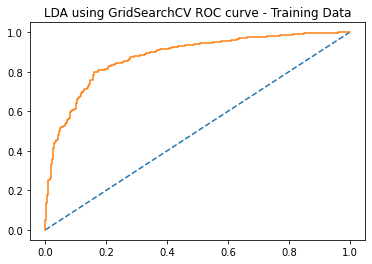

In [345]:
probs_lda_grid = grid_search_lda.predict_proba(X_train)
probs_lda_grid = probs_lda_grid[:, 1]
auc_train_lda_grid = roc_auc_score(y_train, probs_lda_grid)
print('AUC: %.3f' % auc_train_lda_grid)
lda_grid_train_fpr, lda_grid_train_tpr, lda_grid_train_thresholds = roc_curve(y_train, probs_lda_grid)
plt.title('LDA using GridSearchCV ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lda_grid_train_fpr, lda_grid_train_tpr)
plt.show()

Text(0.5, 1.0, 'LDA using Grid Search Confusion Matrix - Training Data')

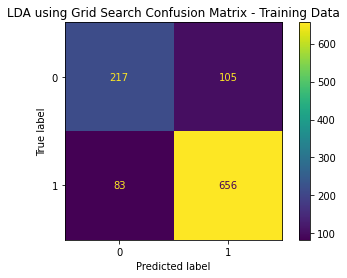

In [346]:
plot_confusion_matrix(grid_search_lda,X_train,y_train);
plt.title('LDA using Grid Search Confusion Matrix - Training Data')

In [347]:
print(classification_report(y_train, ytrain_predict_lda_grid))

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061



Test Data

In [305]:
lda_test_acc_grid = best_grid_lda.score(X_test, y_test)
print("The accuracy of the model is {}".format(lda_test_acc_grid))

The accuracy of the model is 0.8530701754385965


AUC: 0.914


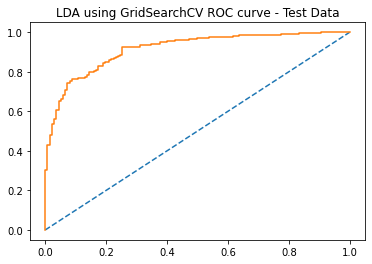

In [348]:
probs_lda_grid = grid_search_lda.predict_proba(X_test)
probs_lda_grid = probs_lda_grid[:, 1]
auc_test_lda_grid = roc_auc_score(y_test, probs_lda_grid)
print('AUC: %.3f' % auc_test_lda_grid)
lda_grid_test_fpr, lda_grid_test_tpr, lda_grid_test_thresholds = roc_curve(y_test, probs_lda_grid)
plt.title('LDA using GridSearchCV ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lda_grid_test_fpr, lda_grid_test_tpr)
plt.show()

Text(0.5, 1.0, 'LDA using Grid Search Confusion Matrix - Test Data')

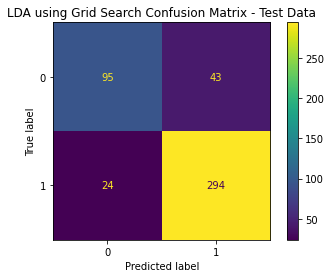

In [349]:
plot_confusion_matrix(grid_search_lda,X_test,y_test);
plt.title('LDA using Grid Search Confusion Matrix - Test Data')

In [350]:
print(classification_report(y_test, ytest_predict_lda_grid))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



KNN Model

Training Data

In [307]:
knn_train_acc = knn_model_scaled.score(X_train_scaled, y_train_scaled)
print("The accuracy of the model is {}".format(knn_train_acc))

The accuracy of the model is 0.8680490103675778


AUC: 0.931


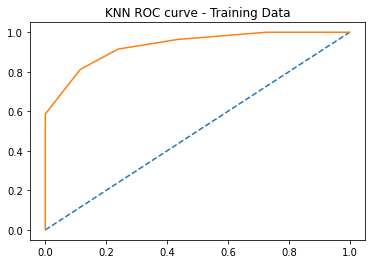

In [308]:
probs_knn = knn_model_scaled.predict_proba(X_train_scaled)
probs_knn = probs_knn[:, 1]
auc_train_knn = roc_auc_score(y_train_scaled, probs_knn)
print('AUC: %.3f' % auc_train_knn)
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train_scaled, probs_knn)
plt.title('KNN ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(knn_train_fpr, knn_train_tpr)
plt.show()

Text(0.5, 1.0, 'KNN Model Confusion Matrix - Training Data')

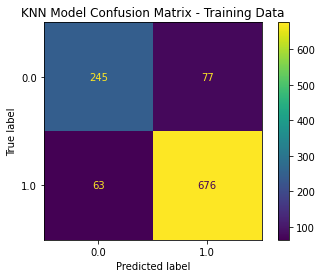

In [309]:
plot_confusion_matrix(knn_model_scaled,X_train_scaled,y_train_scaled);
plt.title('KNN Model Confusion Matrix - Training Data')

In [310]:
print(classification_report(y_train_scaled, ytrain_predict_knn_scaled))

              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       322
         1.0       0.90      0.91      0.91       739

    accuracy                           0.87      1061
   macro avg       0.85      0.84      0.84      1061
weighted avg       0.87      0.87      0.87      1061



Test Data

In [311]:
knn_test_acc = knn_model_scaled.score(X_test_scaled, y_test_scaled)
print("The accuracy of the model is {}".format(knn_test_acc))

The accuracy of the model is 0.8442982456140351


AUC: 0.877


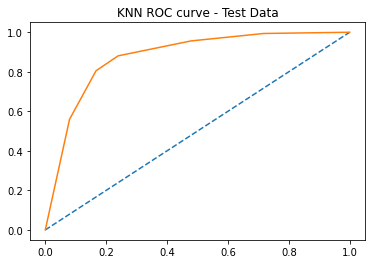

In [312]:
probs_knn = knn_model_scaled.predict_proba(X_test_scaled)
probs_knn = probs_knn[:, 1]
auc_test_knn = roc_auc_score(y_test_scaled, probs_knn)
print('AUC: %.3f' % auc_test_knn)
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test_scaled, probs_knn)
plt.title('KNN ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(knn_test_fpr, knn_test_tpr)
plt.show()

Text(0.5, 1.0, 'KNN Model Confusion Matrix - Test Data')

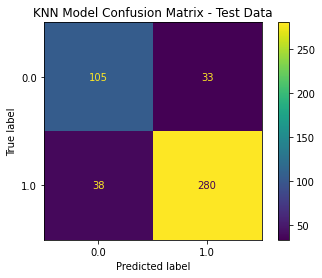

In [313]:
plot_confusion_matrix(knn_model_scaled,X_test_scaled,y_test_scaled);
plt.title('KNN Model Confusion Matrix - Test Data')

In [314]:
print(classification_report(y_test_scaled, ytest_predict_knn_scaled))

              precision    recall  f1-score   support

         0.0       0.73      0.76      0.75       138
         1.0       0.89      0.88      0.89       318

    accuracy                           0.84       456
   macro avg       0.81      0.82      0.82       456
weighted avg       0.85      0.84      0.85       456



KNN Model - With best K value

Training Data

In [315]:
knn_train_acc_best = knn_model_best.score(X_train_scaled, y_train_scaled)
print("The accuracy of the model is {}".format(knn_train_acc_best))

The accuracy of the model is 0.8397737983034873


AUC: 0.907


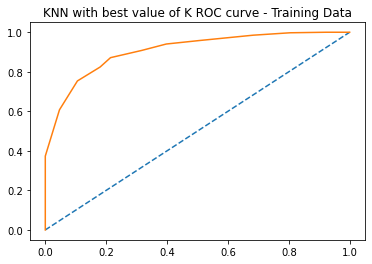

In [316]:
probs_knn = knn_model_best.predict_proba(X_train_scaled)
probs_knn = probs_knn[:, 1]
auc_train_knn_best = roc_auc_score(y_train_scaled, probs_knn)
print('AUC: %.3f' % auc_train_knn_best)
knn_best_train_fpr, knn_best_train_tpr, knn_best_train_thresholds = roc_curve(y_train_scaled, probs_knn)
plt.title('KNN with best value of K ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(knn_best_train_fpr, knn_best_train_tpr)
plt.show()

Text(0.5, 1.0, 'KNN Model with best value of k Confusion Matrix - Training Data')

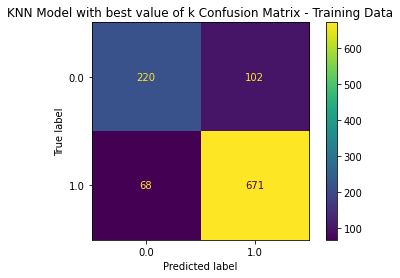

In [317]:
plot_confusion_matrix(knn_model_best,X_train_scaled,y_train_scaled);
plt.title('KNN Model with best value of k Confusion Matrix - Training Data')

In [318]:
print(classification_report(y_train_scaled, ytrain_predict_knn_best))

              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72       322
         1.0       0.87      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.80      1061
weighted avg       0.84      0.84      0.84      1061



Test Data

In [319]:
knn_test_acc_best = knn_model_best.score(X_test_scaled, y_test_scaled)
print("The accuracy of the model is {}".format(knn_test_acc_best))

The accuracy of the model is 0.8618421052631579


AUC: 0.897


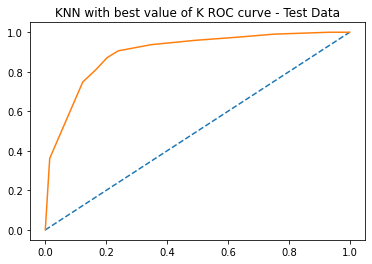

In [320]:
probs_knn = knn_model_best.predict_proba(X_test_scaled)
probs_knn = probs_knn[:, 1]
auc_test_knn_best = roc_auc_score(y_test_scaled, probs_knn)
print('AUC: %.3f' % auc_test_knn_best)
knn_best_test_fpr, knn_best_test_tpr, knn_best_test_thresholds = roc_curve(y_test_scaled, probs_knn)
plt.title('KNN with best value of K ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(knn_best_test_fpr, knn_best_test_tpr)
plt.show()

Text(0.5, 1.0, 'KNN Model with best value of k Confusion Matrix - Test Data')

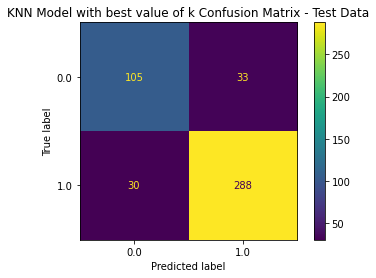

In [321]:
plot_confusion_matrix(knn_model_best,X_test_scaled,y_test_scaled);
plt.title('KNN Model with best value of k Confusion Matrix - Test Data')

In [322]:
print(classification_report(y_test_scaled, ytest_predict_knn_best))

              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77       138
         1.0       0.90      0.91      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.83      0.84       456
weighted avg       0.86      0.86      0.86       456



Naive Bayes Model

Training Data

In [323]:
nb_train_acc = nb_model.score(X_train, y_train)
print("The accuracy of the model is {}".format(nb_train_acc))

The accuracy of the model is 0.8199811498586239


AUC: 0.873


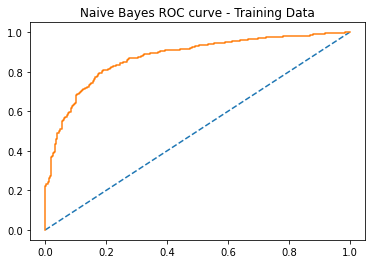

In [324]:
probs_nb = nb_model.predict_proba(X_train)
probs_nb = probs_nb[:, 1]
auc_train_nb = roc_auc_score(y_train, probs_nb)
print('AUC: %.3f' % auc_train_nb)
nb_train_fpr, nb_train_tpr, nb_train_thresholds = roc_curve(y_train, probs_nb)
plt.title('Naive Bayes ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(nb_train_fpr, nb_train_tpr)
plt.show()

Text(0.5, 1.0, 'NB Model Confusion Matrix - Training Data')

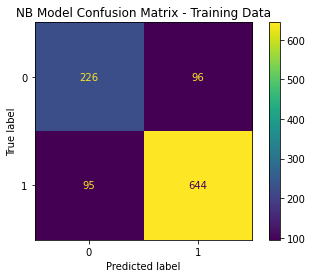

In [325]:
plot_confusion_matrix(nb_model,X_train,y_train);
plt.title('NB Model Confusion Matrix - Training Data')

In [326]:
print(classification_report(y_train, ytrain_predict_nb))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       322
           1       0.87      0.87      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



Test Data

In [327]:
nb_test_acc = nb_model.score(X_test, y_test)
print("The accuracy of the model is {}".format(nb_test_acc))

The accuracy of the model is 0.8574561403508771


AUC: 0.912


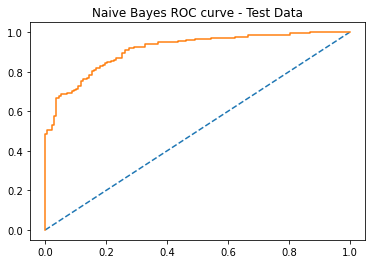

In [328]:
probs_nb = nb_model.predict_proba(X_test)
probs_nb = probs_nb[:, 1]
auc_test_nb = roc_auc_score(y_test, probs_nb)
print('AUC: %.3f' % auc_test_nb)
nb_test_fpr, nb_test_tpr, nb_test_thresholds = roc_curve(y_test, probs_nb)
plt.title('Naive Bayes ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(nb_test_fpr, nb_test_tpr)
plt.show()

Text(0.5, 1.0, 'NB Model Confusion Matrix - Test Data')

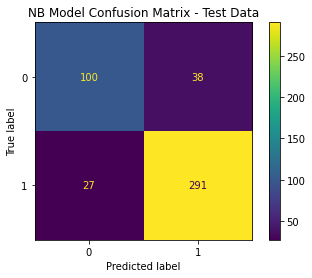

In [329]:
plot_confusion_matrix(nb_model,X_test,y_test);
plt.title('NB Model Confusion Matrix - Test Data')

In [330]:
print(classification_report(y_test, ytest_predict_nb))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456



Ada Boosting

Training Data

In [225]:
adb_train_acc = ADB_model.score(X_train_scaled, y_train_scaled)
print("The accuracy of the model is {}".format(adb_train_acc))

The accuracy of the model is 0.8491988689915174


AUC: 0.904


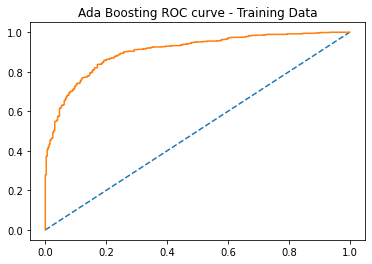

In [331]:
probs_adb = ADB_model.predict_proba(X_train_scaled)
probs_adb = probs_adb[:, 1]
auc_train_adb = roc_auc_score(y_train_scaled, probs_adb)
print('AUC: %.3f' % auc_train_adb)
adb_train_fpr, adb_train_tpr, adb_train_thresholds = roc_curve(y_train_scaled, probs_adb)
plt.title('Ada Boosting ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(adb_train_fpr, adb_train_tpr)
plt.show()

Text(0.5, 1.0, 'Ada Boosting Confusion Matrix - Train Data')

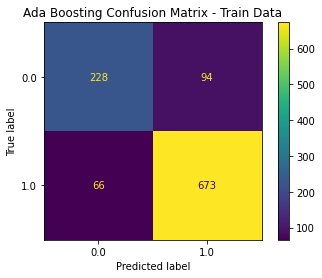

In [240]:
plot_confusion_matrix(ADB_model,X_train_scaled,y_train_scaled);
plt.title('Ada Boosting Confusion Matrix - Train Data')

In [249]:
print(classification_report(y_train_scaled, ytrain_predict_adb))

              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74       322
         1.0       0.88      0.91      0.89       739

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



Test Data

In [226]:
adb_test_acc = ADB_model.score(X_test_scaled, y_test_scaled)
print("The accuracy of the model is {}".format(adb_test_acc))

The accuracy of the model is 0.8355263157894737


AUC: 0.908


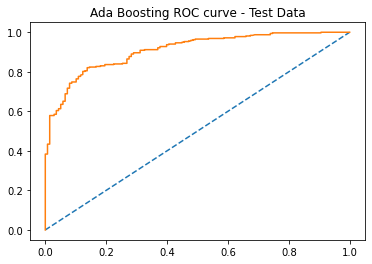

In [332]:
probs_adb = ADB_model.predict_proba(X_test_scaled)
probs_adb = probs_adb[:, 1]
auc_test_adb = roc_auc_score(y_test_scaled, probs_adb)
print('AUC: %.3f' % auc_test_adb)
adb_test_fpr, adb_test_tpr, adb_test_thresholds = roc_curve(y_test_scaled, probs_adb)
plt.title('Ada Boosting ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(adb_test_fpr, adb_test_tpr)
plt.show()

Text(0.5, 1.0, 'Ada Boosting Confusion Matrix - Test Data')

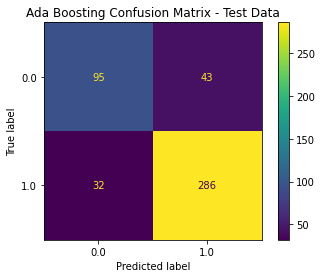

In [241]:
plot_confusion_matrix(ADB_model,X_test_scaled,y_test_scaled);
plt.title('Ada Boosting Confusion Matrix - Test Data')

In [333]:
print(classification_report(y_test_scaled, ytest_predict_adb))

              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72       138
         1.0       0.87      0.90      0.88       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456



Gradient Boosting

Training Data

In [227]:
gbcl_train_acc = gbcl_model.score(X_train_scaled, y_train_scaled)
print("The accuracy of the model is {}".format(gbcl_train_acc))

The accuracy of the model is 0.885956644674835


AUC: 0.947


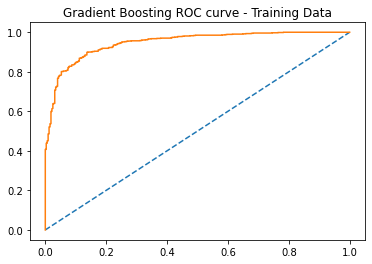

In [334]:
probs_gbcl = gbcl_model.predict_proba(X_train_scaled)
probs_gbcl = probs_gbcl[:, 1]
auc_train_gbcl = roc_auc_score(y_train_scaled, probs_gbcl)
print('AUC: %.3f' % auc_train_gbcl)
gbcl_train_fpr, gbcl_train_tpr, gbcl_train_thresholds = roc_curve(y_train_scaled, probs_gbcl)
plt.title('Gradient Boosting ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(gbcl_train_fpr, gbcl_train_tpr)
plt.show()

Text(0.5, 1.0, 'Gradient Boosting Confusion Matrix - Train Data')

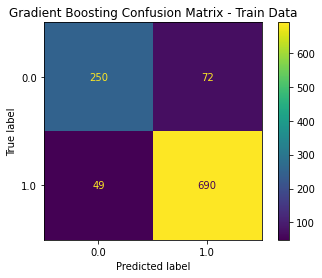

In [242]:
plot_confusion_matrix(gbcl_model,X_train_scaled,y_train_scaled);
plt.title('Gradient Boosting Confusion Matrix - Train Data')

In [335]:
print(classification_report(y_train_scaled, ytrain_predict_gbcl))

              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81       322
         1.0       0.91      0.93      0.92       739

    accuracy                           0.89      1061
   macro avg       0.87      0.86      0.86      1061
weighted avg       0.88      0.89      0.88      1061



Test Data

In [228]:
gbcl_test_acc = gbcl_model.score(X_test_scaled, y_test_scaled)
print("The accuracy of the model is {}".format(gbcl_test_acc))

The accuracy of the model is 0.8421052631578947


AUC: 0.904


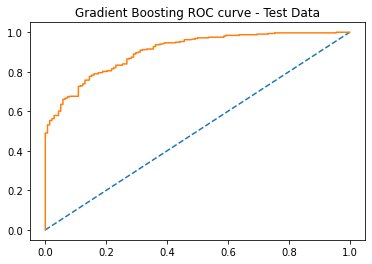

In [336]:
probs_gbcl = gbcl_model.predict_proba(X_test_scaled)
probs_gbcl = probs_gbcl[:, 1]
auc_test_gbcl = roc_auc_score(y_test_scaled, probs_gbcl)
print('AUC: %.3f' % auc_test_gbcl)
gbcl_test_fpr, gbcl_test_tpr, gbcl_test_thresholds = roc_curve(y_test_scaled, probs_gbcl)
plt.title('Gradient Boosting ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(gbcl_test_fpr, gbcl_test_tpr)
plt.show()

Text(0.5, 1.0, 'Gradient Boosting Confusion Matrix - Test Data')

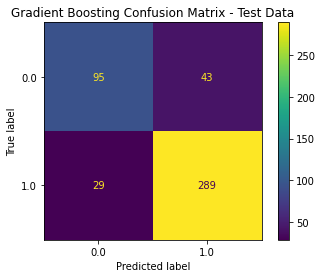

In [243]:
plot_confusion_matrix(gbcl_model,X_test_scaled,y_test_scaled);
plt.title('Gradient Boosting Confusion Matrix - Test Data')

In [337]:
print(classification_report(y_test_scaled, ytest_predict_gbcl))

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73       138
         1.0       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456



Random Forest

Training Data

In [229]:
rfcl_train_acc = rfcl_model.score(X_train_scaled, y_train_scaled)
print("The accuracy of the model is {}".format(rfcl_train_acc))

The accuracy of the model is 1.0


AUC: 1.000


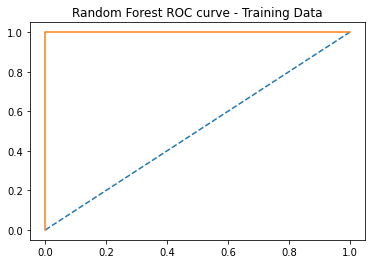

In [250]:
probs_rfcl = rfcl_model.predict_proba(X_train_scaled)
probs_rfcl = probs_rfcl[:, 1]
auc_train_rfcl = roc_auc_score(y_train_scaled, probs_rfcl)
print('AUC: %.3f' % auc_train_rfcl)
rfcl_train_fpr, rfcl_train_tpr, rfcl_train_thresholds = roc_curve(y_train_scaled, probs_rfcl)
plt.title('Random Forest ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rfcl_train_fpr, rfcl_train_tpr)
plt.show()

Text(0.5, 1.0, 'Random Forest Confusion Matrix - Train Data')

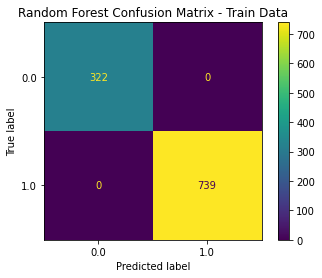

In [251]:
plot_confusion_matrix(rfcl_model,X_train_scaled,y_train_scaled);
plt.title('Random Forest Confusion Matrix - Train Data')

In [252]:
print(classification_report(y_train_scaled, ytrain_predict_rfcl))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       322
         1.0       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



Test Data

In [253]:
rfcl_test_acc = rfcl_model.score(X_test_scaled, y_test_scaled)
print("The accuracy of the model is {}".format(rfcl_test_acc))

The accuracy of the model is 0.8508771929824561


AUC: 0.891


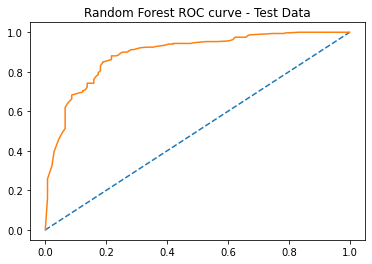

In [254]:
probs_rfcl = rfcl_model.predict_proba(X_test_scaled)
probs_rfcl = probs_rfcl[:, 1]
auc_test_rfcl = roc_auc_score(y_test_scaled, probs_rfcl)
print('AUC: %.3f' % auc_test_rfcl)
rfcl_test_fpr, rfcl_test_tpr, rfcl_test_thresholds = roc_curve(y_test_scaled, probs_rfcl)
plt.title('Random Forest ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rfcl_test_fpr, rfcl_test_tpr)
plt.show()

Text(0.5, 1.0, 'Random Forest Confusion Matrix - Test Data')

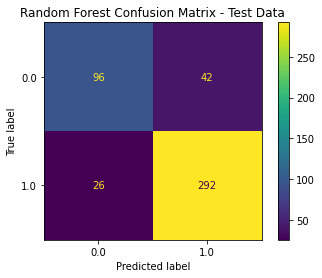

In [255]:
plot_confusion_matrix(rfcl_model,X_test_scaled,y_test_scaled);
plt.title('Random Forest Confusion Matrix - Test Data')

In [256]:
print(classification_report(y_test_scaled, ytest_predict_rfcl))

              precision    recall  f1-score   support

         0.0       0.79      0.70      0.74       138
         1.0       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.83      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



Bagging

Training Data

In [257]:
bagging_train_acc = bagging_model.score(X_train_scaled, y_train_scaled)
print("The accuracy of the model is {}".format(bagging_train_acc))

The accuracy of the model is 0.9679547596606974


AUC: 0.997


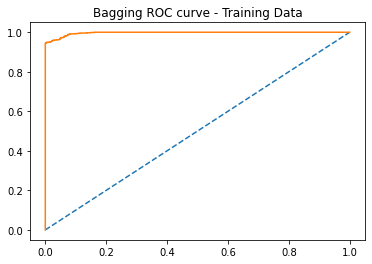

In [258]:
probs_bagging = bagging_model.predict_proba(X_train_scaled)
probs_bagging = probs_bagging[:, 1]
auc_train_bagging = roc_auc_score(y_train_scaled, probs_bagging)
print('AUC: %.3f' % auc_train_bagging)
bagging_train_fpr, bagging_train_tpr, bagging_train_thresholds = roc_curve(y_train_scaled, probs_bagging)
plt.title('Bagging ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(bagging_train_fpr, bagging_train_tpr)
plt.show()

Text(0.5, 1.0, 'Bagging Confusion Matrix - Train Data')

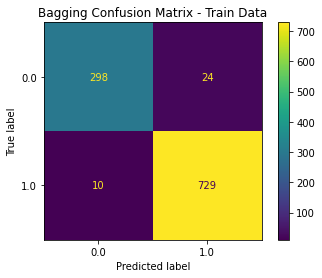

In [259]:
plot_confusion_matrix(bagging_model,X_train_scaled,y_train_scaled);
plt.title('Bagging Confusion Matrix - Train Data')

In [260]:
print(classification_report(y_train_scaled, ytrain_predict_bagging))

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       322
         1.0       0.97      0.99      0.98       739

    accuracy                           0.97      1061
   macro avg       0.97      0.96      0.96      1061
weighted avg       0.97      0.97      0.97      1061



Test Data

In [261]:
bagging_test_acc = bagging_model.score(X_test_scaled, y_test_scaled)
print("The accuracy of the model is {}".format(bagging_test_acc))

The accuracy of the model is 0.8508771929824561


AUC: 0.910


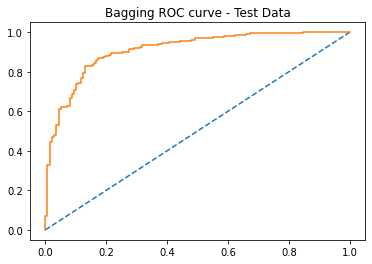

In [262]:
probs_bagging = bagging_model.predict_proba(X_test_scaled)
probs_bagging = probs_bagging[:, 1]
auc_test_bagging = roc_auc_score(y_test_scaled, probs_bagging)
print('AUC: %.3f' % auc_test_bagging)
bagging_test_fpr, bagging_test_tpr, bagging_test_thresholds = roc_curve(y_test_scaled, probs_bagging)
plt.title('Bagging ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(bagging_test_fpr, bagging_test_tpr)
plt.show()

Text(0.5, 1.0, 'Bagging Confusion Matrix - Test Data')

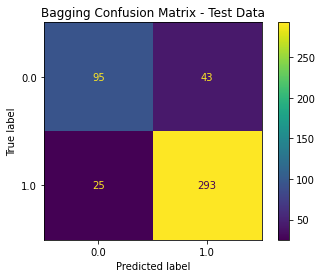

In [263]:
plot_confusion_matrix(bagging_model,X_test_scaled,y_test_scaled);
plt.title('Bagging Confusion Matrix - Test Data')

In [264]:
print(classification_report(y_test_scaled, ytest_predict_bagging))

              precision    recall  f1-score   support

         0.0       0.79      0.69      0.74       138
         1.0       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.83      0.80      0.82       456
weighted avg       0.85      0.85      0.85       456



Compare all models

In [265]:
logistic_metrics=classification_report(y_train, ytrain_predict_logistic_scaled,output_dict=True)
df=pd.DataFrame(logistic_metrics).transpose()
logistic_train_precision=round(df.loc["1"][0],2)
logistic_train_recall=round(df.loc["1"][1],2)
logistic_train_f1=round(df.loc["1"][2],2)
print ('logistic_train_precision ',logistic_train_precision)
print ('logistic_train_recall ',logistic_train_recall)
print ('logistic_train_f1 ',logistic_train_f1)
logistic_metrics=classification_report(y_test, ytest_predict_logistic_scaled,output_dict=True)
df=pd.DataFrame(logistic_metrics).transpose()
logistic_test_precision=round(df.loc["1"][0],2)
logistic_test_recall=round(df.loc["1"][1],2)
logistic_test_f1=round(df.loc["1"][2],2)
print ('logistic_test_precision ',logistic_test_precision)
print ('logistic_test_recall ',logistic_test_recall)
print ('logistic_test_f1 ',logistic_test_f1)

logistic_train_precision  0.86
logistic_train_recall  0.9
logistic_train_f1  0.88
logistic_test_precision  0.86
logistic_test_recall  0.93
logistic_test_f1  0.9


In [285]:
logistic_grid_metrics=classification_report(y_train, ytrain_predict_logistic_grid,output_dict=True)
df=pd.DataFrame(logistic_grid_metrics).transpose()
logistic_grid_train_f1=round(df.loc["1"][2],2)
logistic_grid_train_recall=round(df.loc["1"][1],2)
logistic_grid_train_precision=round(df.loc["1"][0],2)
print ('logistic_grid_train_precision ',logistic_grid_train_precision)
print ('logistic_grid_train_recall ',logistic_grid_train_recall)
print ('logistic_grid_train_f1 ',logistic_grid_train_f1)
logistic_grid_test_metrics=classification_report(y_test, ytest_predict_logistic_grid,output_dict=True)
df=pd.DataFrame(logistic_grid_test_metrics).transpose()
logistic_grid_test_precision=round(df.loc["1"][0],2)
logistic_grid_test_recall=round(df.loc["1"][1],2)
logistic_grid_test_f1=round(df.loc["1"][2],2)
print ('logistic_grid_test_precision ',logistic_grid_test_precision)
print ('logistic_grid_test_recall ',logistic_grid_test_recall)
print ('logistic_grid_test_f1 ',logistic_grid_test_f1)

logistic_grid_train_precision  0.86
logistic_grid_train_recall  0.9
logistic_grid_train_f1  0.88
logistic_grid_test_precision  0.86
logistic_grid_test_recall  0.93
logistic_grid_test_f1  0.9


In [267]:
lda_metrics=classification_report(y_train, ytrain_predict_lda,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)
lda_test_metrics=classification_report(y_test, ytest_predict_lda,output_dict=True)
df=pd.DataFrame(lda_test_metrics).transpose()
lda_test_precision=round(df.loc["1"][0],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_f1=round(df.loc["1"][2],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_train_precision  0.86
lda_train_recall  0.89
lda_train_f1  0.87
lda_test_precision  0.87
lda_test_recall  0.92
lda_test_f1  0.9


In [268]:
lda_grid_metrics=classification_report(y_train, ytrain_predict_lda_grid,output_dict=True)
df=pd.DataFrame(lda_grid_metrics).transpose()
lda_grid_train_precision=round(df.loc["1"][0],2)
lda_grid_train_recall=round(df.loc["1"][1],2)
lda_grid_train_f1=round(df.loc["1"][2],2)
print ('lda_grid_train_precision ',lda_grid_train_precision)
print ('lda_grid_train_recall ',lda_grid_train_recall)
print ('lda_grid_train_f1 ',lda_grid_train_f1)
lda_grid_metrics=classification_report(y_test, ytest_predict_lda_grid,output_dict=True)
df=pd.DataFrame(lda_grid_metrics).transpose()
lda_grid_test_precision=round(df.loc["1"][0],2)
lda_grid_test_recall=round(df.loc["1"][1],2)
lda_grid_test_f1=round(df.loc["1"][2],2)
print ('lda_grid_test_precision ',lda_grid_test_precision)
print ('lda_grid_test_recall ',lda_grid_test_recall)
print ('lda_grid_test_f1 ',lda_grid_test_f1)

lda_grid_train_precision  0.86
lda_grid_train_recall  0.89
lda_grid_train_f1  0.87
lda_grid_test_precision  0.87
lda_grid_test_recall  0.92
lda_grid_test_f1  0.9


In [277]:
knn_metrics=classification_report(y_train,ytrain_predict_knn_scaled,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_train_precision=round(df.loc["1"][0],2)
knn_train_recall=round(df.loc["1"][1],2)
knn_train_f1=round(df.loc["1"][2],2)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)
knn_metrics=classification_report(y_test, ytest_predict_knn_scaled,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_test_precision=round(df.loc["1"][0],2)
knn_test_recall=round(df.loc["1"][1],2)
knn_test_f1=round(df.loc["1"][2],2)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)

knn_train_precision  0.9
knn_train_recall  0.91
knn_train_f1  0.91
knn_test_precision  0.89
knn_test_recall  0.88
knn_test_f1  0.89


In [278]:
knn_best_metrics=classification_report(y_train, ytrain_predict_knn_best,output_dict=True)
df=pd.DataFrame(knn_best_metrics).transpose()
knn_best_train_precision=round(df.loc["1"][0],2)
knn_best_train_recall=round(df.loc["1"][1],2)
knn_best_train_f1=round(df.loc["1"][2],2)
print ('knn_best_train_precision ',knn_best_train_precision)
print ('knn_best_train_recall ',knn_best_train_recall)
print ('knn_best_train_f1 ',knn_best_train_f1)
knn_best_metrics=classification_report(y_test, ytest_predict_knn_best,output_dict=True)
df=pd.DataFrame(knn_best_metrics).transpose()
knn_best_test_precision=round(df.loc["1"][0],2)
knn_best_test_recall=round(df.loc["1"][1],2)
knn_best_test_f1=round(df.loc["1"][2],2)
print ('knn_best_test_precision ',knn_best_test_precision)
print ('knn_best_test_recall ',knn_best_test_recall)
print ('knn_best_test_f1 ',knn_best_test_f1)

knn_best_train_precision  0.87
knn_best_train_recall  0.91
knn_best_train_f1  0.89
knn_best_test_precision  0.9
knn_best_test_recall  0.91
knn_best_test_f1  0.9


In [279]:
nb_metrics=classification_report(y_train, ytrain_predict_nb,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_train_precision=round(df.loc["1"][0],2)
nb_train_recall=round(df.loc["1"][1],2)
nb_train_f1=round(df.loc["1"][2],2)
print ('nb_train_precision ',nb_train_precision)
print ('nb_train_recall ',nb_train_recall)
print ('nb_train_f1 ',nb_train_f1)
nb_metrics=classification_report(y_test, ytest_predict_nb,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_test_precision=round(df.loc["1"][0],2)
nb_test_recall=round(df.loc["1"][1],2)
nb_test_f1=round(df.loc["1"][2],2)
print ('nb_test_precision ',nb_test_precision)
print ('nb_test_recall ',nb_test_recall)
print ('nb_test_f1 ',nb_test_f1)

nb_train_precision  0.87
nb_train_recall  0.87
nb_train_f1  0.87
nb_test_precision  0.88
nb_test_recall  0.92
nb_test_f1  0.9


In [280]:
adb_metrics=classification_report(y_train, ytrain_predict_adb,output_dict=True)
df=pd.DataFrame(adb_metrics).transpose()
adb_train_precision=round(df.loc["1"][0],2)
adb_train_recall=round(df.loc["1"][1],2)
adb_train_f1=round(df.loc["1"][2],2)
print ('adb_train_precision ',adb_train_precision)
print ('adb_train_recall ',adb_train_recall)
print ('adb_train_f1 ',adb_train_f1)
adb_metrics=classification_report(y_test, ytest_predict_adb,output_dict=True)
df=pd.DataFrame(adb_metrics).transpose()
adb_test_precision=round(df.loc["1"][0],2)
adb_test_recall=round(df.loc["1"][1],2)
adb_test_f1=round(df.loc["1"][2],2)
print ('adb_test_precision ',adb_test_precision)
print ('adb_test_recall ',adb_test_recall)
print ('adb_test_f1 ',adb_test_f1)

adb_train_precision  0.88
adb_train_recall  0.91
adb_train_f1  0.89
adb_test_precision  0.87
adb_test_recall  0.9
adb_test_f1  0.88


In [281]:
gbcl_metrics=classification_report(y_train, ytrain_predict_gbcl,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_train_precision=round(df.loc["1"][0],2)
gbcl_train_recall=round(df.loc["1"][1],2)
gbcl_train_f1=round(df.loc["1"][2],2)
print ('gbcl_train_precision ',gbcl_train_precision)
print ('gbcl_train_recall ',gbcl_train_recall)
print ('gbcl_train_f1 ',gbcl_train_f1)
gbcl_metrics=classification_report(y_test, ytest_predict_gbcl,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_test_precision=round(df.loc["1"][0],2)
gbcl_test_recall=round(df.loc["1"][1],2)
gbcl_test_f1=round(df.loc["1"][2],2)
print ('gbcl_test_precision ',gbcl_test_precision)
print ('gbcl_test_recall ',gbcl_test_recall)
print ('gbcl_test_f1 ',gbcl_test_f1)

gbcl_train_precision  0.91
gbcl_train_recall  0.93
gbcl_train_f1  0.92
gbcl_test_precision  0.87
gbcl_test_recall  0.91
gbcl_test_f1  0.89


In [282]:
rfcl_metrics=classification_report(y_train, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rfcl_metrics).transpose()
rfcl_train_precision=round(df.loc["1"][0],2)
rfcl_train_recall=round(df.loc["1"][1],2)
rfcl_train_f1=round(df.loc["1"][2],2)
print ('rfcl_train_precision ',rfcl_train_precision)
print ('rfcl_train_recall ',rfcl_train_recall)
print ('rfcl_train_f1 ',rfcl_train_f1)
rfcl_metrics=classification_report(y_test, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rfcl_metrics).transpose()
rfcl_test_precision=round(df.loc["1"][0],2)
rfcl_test_recall=round(df.loc["1"][1],2)
rfcl_test_f1=round(df.loc["1"][2],2)
print ('rfcl_test_precision ',rfcl_test_precision)
print ('rfcl_test_recall ',rfcl_test_recall)
print ('rfcl_test_f1 ',rfcl_test_f1)

rfcl_train_precision  1.0
rfcl_train_recall  1.0
rfcl_train_f1  1.0
rfcl_test_precision  0.87
rfcl_test_recall  0.92
rfcl_test_f1  0.9


In [283]:
bagging_metrics=classification_report(y_train, ytrain_predict_bagging,output_dict=True)
df=pd.DataFrame(bagging_metrics).transpose()
bagging_train_precision=round(df.loc["1"][0],2)
bagging_train_recall=round(df.loc["1"][1],2)
bagging_train_f1=round(df.loc["1"][2],2)
print ('bagging_train_precision ',bagging_train_precision)
print ('bagging_train_recall ',bagging_train_recall)
print ('bagging_train_f1 ',bagging_train_f1)
bagging_metrics=classification_report(y_test, ytest_predict_bagging,output_dict=True)
df=pd.DataFrame(bagging_metrics).transpose()
bagging_test_precision=round(df.loc["1"][0],2)
bagging_test_recall=round(df.loc["1"][1],2)
bagging_test_f1=round(df.loc["1"][2],2)
print ('bagging_test_precision ',bagging_test_precision)
print ('bagging_test_recall ',bagging_test_recall)
print ('bagging_test_f1 ',bagging_test_f1)

bagging_train_precision  0.97
bagging_train_recall  0.99
bagging_train_f1  0.98
bagging_test_precision  0.87
bagging_test_recall  0.92
bagging_test_f1  0.9


In [351]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Log Train':[logistic_train_acc,auc_train_logistic,logistic_train_recall,logistic_train_precision,logistic_train_f1],
        'Log Test':[logistic_train_acc,auc_train_logistic,logistic_test_recall,logistic_test_precision,logistic_test_f1],
       'Log Grid Train':[logistic_train_acc_grid,auc_train_logistic_grid,logistic_grid_train_recall,logistic_grid_train_precision,logistic_grid_train_f1],
        'Log Grid Test':[logistic_test_acc_grid,auc_test_logistic_grid,logistic_grid_test_recall,logistic_grid_test_precision,logistic_grid_test_f1],
       'LDA Train':[lda_train_acc,auc_train_lda,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,auc_test_lda,lda_test_recall,lda_test_precision,lda_test_f1],
        'LDA Grid Train':[lda_train_acc_grid,auc_train_lda_grid,lda_grid_train_recall,lda_grid_train_precision,lda_grid_train_f1],
        'LDA Grid Test':[lda_test_acc_grid,auc_test_lda_grid,lda_grid_test_recall,lda_grid_test_precision,lda_grid_test_f1],
        'KNN Train':[knn_train_acc,auc_train_knn,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test':[knn_test_acc,auc_test_knn,knn_test_recall,knn_test_precision,knn_test_f1],
        'KNN best Train':[knn_train_acc_best,auc_train_knn_best,knn_best_train_recall,knn_best_train_precision,knn_best_train_f1],
        'KNN best Test':[knn_test_acc_best,auc_test_knn_best,knn_best_test_recall,knn_best_test_precision,knn_best_test_f1],
},index=index)
round(data,2)

,Log Train,Log Test,Log Grid Train,Log Grid Test,LDA Train,LDA Test,LDA Grid Train,LDA Grid Test,KNN Train,KNN Test,KNN best Train,KNN best Test
Accuracy,0.83,0.83,0.83,0.85,0.82,0.85,0.82,0.85,0.87,0.84,0.84,0.86
AUC,0.88,0.88,0.88,0.91,0.88,0.91,0.88,0.91,0.93,0.88,0.91,0.90
Recall,0.90,0.93,0.90,0.93,0.89,0.92,0.89,0.92,0.91,0.88,0.91,0.91
Precision,0.86,0.86,0.86,0.86,0.86,0.87,0.86,0.87,0.90,0.89,0.87,0.90
F1 Score,0.88,0.90,0.88,0.90,0.87,0.90,0.87,0.90,0.91,0.89,0.89,0.90


In [339]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'NB Train':[nb_train_acc,auc_train_nb,nb_train_recall,nb_train_precision,nb_train_f1],
        'NB Test':[nb_test_acc,auc_test_nb,nb_test_recall,nb_test_precision,nb_test_f1],
       'ADB Train':[adb_train_acc,auc_train_adb,adb_train_recall,adb_train_precision,adb_train_f1],
        'ADB Test':[adb_test_acc,auc_test_adb,adb_test_recall,adb_test_precision,adb_test_f1],
        'GBCL Train':[gbcl_train_acc,auc_train_gbcl,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1],
        'GBCL Test':[gbcl_test_acc,auc_test_gbcl,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1],
        'RFCL Train':[rfcl_train_acc,auc_train_rfcl,rfcl_train_recall,rfcl_train_precision,rfcl_train_f1],
        'RFCL Test':[rfcl_test_acc,auc_test_rfcl,rfcl_test_recall,rfcl_test_precision,rfcl_test_f1],
        'Bagging Train':[bagging_train_acc,auc_train_bagging,bagging_train_recall,bagging_train_precision,bagging_train_f1],
        'Bagging Test':[bagging_test_acc,auc_test_bagging,bagging_test_recall,bagging_test_precision,bagging_test_f1],
},index=index)
round(data,2)

,NB Train,NB Test,ADB Train,ADB Test,GBCL Train,GBCL Test,RFCL Train,RFCL Test,Bagging Train,Bagging Test
Accuracy,0.82,0.86,0.85,0.84,0.89,0.84,1.0,0.85,0.97,0.85
AUC,0.87,0.91,0.90,0.91,0.95,0.90,1.0,0.89,1.00,0.91
Recall,0.87,0.92,0.91,0.90,0.93,0.91,1.0,0.92,0.99,0.92
Precision,0.87,0.88,0.88,0.87,0.91,0.87,1.0,0.87,0.97,0.87
F1 Score,0.87,0.90,0.89,0.88,0.92,0.89,1.0,0.90,0.98,0.90


Inference:

1.8 Based on these predictions, what are the insights? (5 marks)

In [ ]:
Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

from google.colab import drive

drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")

data_dictionary = pd.read_excel("/content/drive/MyDrive/Great Learning/Machine Learning/Election_Data.xlsx")
data_dictionary

df1=pd.read_excel("/content/drive/MyDrive/Great Learning/Machine Learning/Election_Data.xlsx",sheet_name='Election_Dataset_Two Classes')

Data Ingestion:

1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

df1.head()

df1=df1.drop(["Unnamed: 0"],axis=1)

df1.shape

print("The no. of rows: ",df1.shape[0], "\n""The no. of columns: ",df1.shape[1])

df1.info()

df1.dtypes

df1.isnull().sum()

cat=[]
num=[]
for i in df1.columns:
    if df1[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

for variable in cat:
    print(variable,":", sum(df1[variable] == '?'))

dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df1[dups]

df1.drop_duplicates(inplace=True)

dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df1[num].describe().T

df1[cat].describe().T

for column in df1.columns:
    if df1[column].dtype == 'object':
        print(column.upper(),': ',df1[column].nunique())
        print(df1[column].value_counts().sort_values())
        print('\n')

1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

Univariate Analysis

plt.figure(figsize=(15,8))
plt.title("Boxplot containing entire data")
sns.boxplot(data=df1,orient="h");

df1.skew(axis = 0, skipna = True).sort_values(ascending=False)

def univariateAnalysis_numeric(column,nbins):
    print("\nDescription of " + column)
    print("----------------------------------------------------------------------------")
    print(df1[column].describe(),end=' ')
    print('\n')

df1_num = df1.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df1_num.columns.values)
len(lstnumericcolumns)

for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,7)

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df1['age'].quantile(q=0.25)
Q3=df1['age'].quantile(q=0.75)
print('Interquartile range (IQR) of age is ', stats.iqr(df1['age']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in age: ', L_outliers)
print('Upper limit in age: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='age',data=df1,orient='v',ax=ax1);
ax1.set_ylabel('age')
ax1.set_title('Boxplot of age')

#distplot
sns.distplot(df1['age'],ax=ax2);
ax2.set_xlabel('age')
ax2.set_title('Distribution of age')

#histogram
ax3.hist(df1['age']);
ax3.set_xlabel('age')
ax3.set_title('Histogram of age')

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df1['economic.cond.national'].quantile(q=0.25)
Q3=df1['economic.cond.national'].quantile(q=0.75)
print('Interquartile range (IQR) of economic.cond.national is ', stats.iqr(df1['economic.cond.national']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in economic.cond.national: ', L_outliers)
print('Upper limit in economic.cond.national: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='economic.cond.national',data=df1,orient='v',ax=ax1);
ax1.set_ylabel('economic.cond.national')
ax1.set_title('Boxplot of economic.cond.national')

#distplot
sns.distplot(df1['economic.cond.national'],ax=ax2);
ax2.set_xlabel('economic.cond.national')
ax2.set_title('Distribution of economic.cond.national')

#histogram
ax3.hist(df1['economic.cond.national']);
ax3.set_xlabel('economic.cond.national')
ax3.set_title('Histogram of economic.cond.national')

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df1['economic.cond.household'].quantile(q=0.25)
Q3=df1['economic.cond.household'].quantile(q=0.75)
print('Interquartile range (IQR) of economic.cond.household is ', stats.iqr(df1['economic.cond.household']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in economic.cond.household: ', L_outliers)
print('Upper limit in economic.cond.household: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='economic.cond.household',data=df1,orient='v',ax=ax1);
ax1.set_ylabel('economic.cond.household')
ax1.set_title('Boxplot of economic.cond.household')

#distplot
sns.distplot(df1['economic.cond.household'],ax=ax2);
ax2.set_xlabel('economic.cond.household')
ax2.set_title('Distribution of economic.cond.household')

#histogram
ax3.hist(df1['economic.cond.household']);
ax3.set_xlabel('economic.cond.household')
ax3.set_title('Histogram of economic.cond.household')

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df1['Blair'].quantile(q=0.25)
Q3=df1['Blair'].quantile(q=0.75)
print('Interquartile range (IQR) of Blair is ', stats.iqr(df1['Blair']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in Blair: ', L_outliers)
print('Upper limit in Blair: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='Blair',data=df1,orient='v',ax=ax1);
ax1.set_ylabel('Blair')
ax1.set_title('Boxplot of Blair')

#distplot
sns.distplot(df1['Blair'],ax=ax2);
ax2.set_xlabel('Blair')
ax2.set_title('Distribution of Blair')

#histogram
ax3.hist(df1['Blair']);
ax3.set_xlabel('Blair')
ax3.set_title('Histogram of Blair')

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df1['Hague'].quantile(q=0.25)
Q3=df1['Hague'].quantile(q=0.75)
print('Interquartile range (IQR) of Hague is ', stats.iqr(df1['Hague']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in Hague: ', L_outliers)
print('Upper limit in Hague: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='Hague',data=df1,orient='v',ax=ax1);
ax1.set_ylabel('Hague')
ax1.set_title('Boxplot of Hague')

#distplot
sns.distplot(df1['Hague'],ax=ax2);
ax2.set_xlabel('Hague')
ax2.set_title('Distribution of Hague')

#histogram
ax3.hist(df1['Hague']);
ax3.set_xlabel('Hague')
ax3.set_title('Histogram of Hague')

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df1['Europe'].quantile(q=0.25)
Q3=df1['Europe'].quantile(q=0.75)
print('Interquartile range (IQR) of Europe is ', stats.iqr(df1['Europe']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in Europe: ', L_outliers)
print('Upper limit in Europe: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='Europe',data=df1,orient='v',ax=ax1);
ax1.set_ylabel('Europe')
ax1.set_title('Boxplot of Europe')

#distplot
sns.distplot(df1['Europe'],ax=ax2);
ax2.set_xlabel('Europe')
ax2.set_title('Distribution of Europe')

#histogram
ax3.hist(df1['Europe']);
ax3.set_xlabel('Europe')
ax3.set_title('Histogram of Europe')

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df1['political.knowledge'].quantile(q=0.25)
Q3=df1['political.knowledge'].quantile(q=0.75)
print('Interquartile range (IQR) of political.knowledge is ', stats.iqr(df1['political.knowledge']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in political.knowledge: ', L_outliers)
print('Upper limit in political.knowledge: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='political.knowledge',data=df1,orient='v',ax=ax1);
ax1.set_ylabel('political.knowledge')
ax1.set_title('Boxplot of political.knowledge')

#distplot
sns.distplot(df1['political.knowledge'],ax=ax2);
ax2.set_xlabel('political.knowledge')
ax2.set_title('Distribution of political.knowledge')

#histogram
ax3.hist(df1['political.knowledge']);
ax3.set_xlabel('political.knowledge')
ax3.set_title('Histogram of political.knowledge')

plt.title('Countplot of vote')
sns.countplot(data = df1, x = 'vote')

plt.pie(df1['vote'].value_counts(),labels=df1['vote'].value_counts().index,autopct='%1.1f%%')
plt.xlabel('Pie chart of Vote')

plt.title('Countplot of gender')
sns.countplot(data = df1, x = 'gender')

plt.pie(df1['gender'].value_counts(),labels=df1['gender'].value_counts().index,autopct='%1.1f%%')
plt.xlabel('Pie chart of Gender')

Bivariate Analysis

corr = df1_num.corr(method='pearson')
corr

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt = '.2f', cmap="Blues")

plt.figure(figsize=(10,5))
plt.title('Countplot of Gender')
sns.countplot(x='gender',hue='vote',data=df1)

plt.figure(figsize=(10,5))
plt.title('Countplot of economic.cond.national')
sns.countplot(x='economic.cond.national',hue='vote',data=df1)

plt.figure(figsize=(10,5))
plt.title('Countplot of economic.cond.household')
sns.countplot(x='economic.cond.household',hue='vote',data=df1)

plt.figure(figsize=(10,5))
plt.title('Countplot of Blair')
sns.countplot(x='Blair',hue='vote',data=df1)

plt.figure(figsize=(10,5))
plt.title('Countplot of Hague')
sns.countplot(x='Hague',hue='vote',data=df1)

plt.figure(figsize=(10,5))
plt.title('Countplot of Europe')
sns.countplot(x='Europe',hue='vote',data=df1)

plt.figure(figsize=(10,5))
plt.title('Countplot of political.knowledge')
sns.countplot(x='political.knowledge',hue='vote',data=df1)

Multivariate Analysis

sns.pairplot(df1, diag_kind='kde', hue='vote')
plt.tight_layout()

Data Preparation: 

1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print(feature)
        print(df1[feature].value_counts())
        print('\n')

count_labour = len(df1[df1['vote']=='Labour'])
count_conservative = len(df1[df1['vote']=='Conservative'])
pct_labour = count_labour / (count_labour + count_conservative)
print ('Percentage of votes for labour is', pct_labour*100)
pct_conservative = count_conservative / (count_labour + count_conservative)
print ('Percentage of votes for conservative is', pct_conservative*100)

for col in df1.columns:
  if df1[col].dtype == 'object':
    print('\n')
    print('Column Name:', col)
    print(pd.Categorical(df1[col].unique()))
    print(pd.Categorical(df1[col].unique()).codes)
    df1[col] = pd.Categorical(df1[col]).codes

df1['vote'].value_counts().sort_values()

df1['gender'].value_counts().sort_values()

df1.info()

df1.head()

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

scaler = MinMaxScaler().fit(df1)
df1_scaled = scaler.transform(df1)
df1_scaled = pd.DataFrame(df1_scaled,columns = df1.columns)
df1_scaled.head()

df1.describe().T

df1_scaled.describe().T

fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10, 5)
sns.distplot(df1['age'] , ax=axes[0])
sns.distplot(df1_scaled['age'] , ax=axes[1])

X = df1.drop('vote', axis=1)
y = df1['vote']

X_scaled = df1_scaled.drop('vote', axis=1)
y_scaled = df1_scaled['vote']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=df1['vote'])

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=.30, random_state=1, stratify=df1_scaled['vote'])

print('Shape of the data after splitting into train and test set:')
print('The training set for the independent variables: ', X_train.shape)
print('The training set for the dependent variables: ', y_train.shape)
print('The test set for the independent variables: ', X_test.shape)
print('The test set for the independent variables: ', y_test.shape)

print('Shape of the scaled data after splitting into train and test set:')
print('The training set for the independent variables: ', X_train_scaled.shape)
print('The training set for the dependent variables: ', y_train_scaled.shape)
print('The test set for the independent variables: ', X_test_scaled.shape)
print('The test set for the independent variables: ', y_test_scaled.shape)

Modeling:

1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics, model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

Logistic Regression

Scaled data

X_scaled = df1_scaled.drop('vote', axis=1)
y_scaled = df1_scaled['vote']

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=.30, random_state=1, stratify=df1_scaled['vote'])

logistic_model_scaled = LogisticRegression()
logistic_model_scaled.fit(X_train_scaled, y_train_scaled)
logistic_model_scaled

ytrain_predict_logistic_scaled = logistic_model_scaled.predict(X_train_scaled)
ytest_predict_logistic_scaled = logistic_model_scaled.predict(X_test_scaled)

ytest_predict_prob_log_scaled = logistic_model_scaled.predict_proba(X_test_scaled)
pd.DataFrame(ytest_predict_prob_log_scaled).head()

for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, logistic_model_scaled.coef_[0][idx]))

Linear Discriminant Analysis

Un-scaled data

X = df1.drop('vote', axis=1)
y = df1['vote']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=df1['vote'])

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_model

ytrain_predict_lda = lda_model.predict(X_train)
ytest_predict_lda = lda_model.predict(X_test)

ytest_predict_prob_lda = lda_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_lda).head()

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lda_model.coef_[0][idx]))

1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

KNN Model

Scaled data

X_scaled = df1_scaled.drop('vote', axis=1)
y_scaled = df1_scaled['vote']

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=.30, random_state=1, stratify=df1_scaled['vote'])

knn_model_scaled=KNeighborsClassifier()
knn_model_scaled.fit(X_train_scaled,y_train_scaled)
knn_model_scaled

ytrain_predict_knn_scaled = knn_model_scaled.predict(X_train_scaled)
ytest_predict_knn_scaled = knn_model_scaled.predict(X_test_scaled)

ytest_predict_prob_knn_scaled = knn_model_scaled.predict_proba(X_test_scaled)
pd.DataFrame(ytest_predict_prob_knn_scaled).head()

Naive Bayes Model

Un-scaled data

X = df1.drop('vote', axis=1)
y = df1['vote']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df1['vote'])

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_model

ytrain_predict_nb = nb_model.predict(X_train)
ytest_predict_nb = nb_model.predict(X_test)

ytest_predict_prob_nb = nb_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_nb).head()

1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)

Model tuning

Applying GridSearchCV for Logistic Regression - scaled

from sklearn.model_selection import train_test_split,GridSearchCV

param_grid_logistic = {
    'penalty': ['l2','none'],
    'solver': ['sag','lbfgs','liblinear','saga'],
    'tol': [0.0001,0.00001]
}

logistic = LogisticRegression(max_iter=10000,n_jobs=2)

grid_search_logistic = GridSearchCV(estimator = logistic, param_grid = param_grid_logistic, cv = 3,n_jobs=-1,scoring='f1')

grid_search_logistic.fit(X_train_scaled, y_train_scaled)
print(grid_search_logistic.best_params_)
best_grid_logistic = grid_search_logistic.best_estimator_
best_grid_logistic

ytrain_predict_logistic_grid = best_grid_logistic.predict(X_train_scaled)
ytest_predict_logistic_grid = best_grid_logistic.predict(X_test_scaled)

ytest_predict_logistic_prob=best_grid_logistic.predict_proba(X_test_scaled)
pd.DataFrame(ytest_predict_logistic_prob).head()

for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, best_grid_logistic.coef_[0][idx]))

Applying Grid Search CV for Linear Discriminant Analysis

param_grid_lda = {
    'solver': ['svd','lsqr','eigen'],
    'tol': [0.001,0.0001,0.00001]
}

lda = LinearDiscriminantAnalysis()

grid_search_lda = GridSearchCV(estimator = lda, param_grid = param_grid_lda, cv = 3,n_jobs=-1,scoring='accuracy')

grid_search_lda.fit(X_train, y_train)
print(grid_search_lda.best_params_)
best_grid_lda = grid_search_lda.best_estimator_
best_grid_lda

ytrain_predict_lda_grid = best_grid_lda.predict(X_train)
ytest_predict_lda_grid = best_grid_lda.predict(X_test)

ytest_predict_lda_prob=best_grid_logistic.predict_proba(X_test)
pd.DataFrame(ytest_predict_lda_prob).head()

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, best_grid_lda.coef_[0][idx]))

KNN Model - Different values for K

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_scaled)
    # evaluate test accuracy
    scores = knn.score(X_test_scaled, y_test_scaled)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

knn_model_best = KNeighborsClassifier(n_neighbors=11)
knn_model_best.fit(X_train_scaled,y_train_scaled)
knn_model_best

ytrain_predict_knn_best = knn_model_best.predict(X_train_scaled)
ytest_predict_knn_best = knn_model_best.predict(X_test_scaled)

ytest_predict_prob_knn_best = knn_model_best.predict_proba(X_test_scaled)
pd.DataFrame(ytest_predict_prob_knn_best).head()

Ada Boosting

X_scaled = df1_scaled.drop('vote', axis=1)
y_scaled = df1_scaled['vote']

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=.30, random_state=1, stratify=df1_scaled['vote'])

from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train_scaled,y_train_scaled)
ADB_model

ytrain_predict_adb = ADB_model.predict(X_train_scaled)
ytest_predict_adb = ADB_model.predict(X_test_scaled)

ytest_predict_prob_adb = ADB_model.predict_proba(X_test_scaled)
pd.DataFrame(ytest_predict_prob_adb).head()

Gradient Boosting

X_scaled = df1_scaled.drop('vote', axis=1)
y_scaled = df1_scaled['vote']

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=.30, random_state=1, stratify=df1_scaled['vote'])

from sklearn.ensemble import GradientBoostingClassifier
gbcl_model = GradientBoostingClassifier(random_state=1)
gbcl_model = gbcl_model.fit(X_train_scaled, y_train_scaled)
gbcl_model

ytrain_predict_gbcl = gbcl_model.predict(X_train_scaled)
ytest_predict_gbcl = gbcl_model.predict(X_test_scaled)

ytest_predict_prob_gbcl = gbcl_model.predict_proba(X_test_scaled)
pd.DataFrame(ytest_predict_prob_gbcl).head()

Random Forest

X_scaled = df1_scaled.drop('vote', axis=1)
y_scaled = df1_scaled['vote']

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=.30, random_state=1, stratify=df1_scaled['vote'])

from sklearn.ensemble import RandomForestClassifier
rfcl_model=RandomForestClassifier(max_features= 4, n_estimators=100,random_state=1)
rfcl_model.fit(X_train_scaled, y_train_scaled)
rfcl_model

ytrain_predict_rfcl = rfcl_model.predict(X_train_scaled)
ytest_predict_rfcl = rfcl_model.predict(X_test_scaled)

ytest_predict_prob_rfcl = rfcl_model.predict_proba(X_test_scaled)
pd.DataFrame(ytest_predict_prob_rfcl).head()

Bagging

X_scaled = df1_scaled.drop('vote', axis=1)
y_scaled = df1_scaled['vote']

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=.30, random_state=1, stratify=df1_scaled['vote'])

from sklearn.ensemble import BaggingClassifier
rfcl = RandomForestClassifier()
bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=100,random_state=1)
bagging_model.fit(X_train_scaled, y_train_scaled)
bagging_model

ytrain_predict_bagging = bagging_model.predict(X_train_scaled)
ytest_predict_bagging = bagging_model.predict(X_test_scaled)

ytest_predict_prob_bagging = bagging_model.predict_proba(X_test_scaled)
pd.DataFrame(ytest_predict_prob_bagging).head()

1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

Logistic Regression

Training Data

logistic_train_acc = logistic_model_scaled.score(X_train_scaled, y_train_scaled)
print("The accuracy of the model is {}".format(logistic_train_acc))

logistic_intercept = logistic_model_scaled.intercept_[0]
print("The intercept for the model is {}".format(logistic_intercept))

AUC and ROC for the training data

probs_logistic = logistic_model_scaled.predict_proba(X_train_scaled)
probs_logistic = probs_logistic[:, 1]
auc_train_logistic = roc_auc_score(y_train_scaled, probs_logistic)
print('AUC: %.3f' % auc_train_logistic)
logistic_train_fpr, logistic_train_tpr, logistic_train_thresholds = roc_curve(y_train_scaled, probs_logistic)
plt.title('Logistic Regression ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_train_fpr, logistic_train_tpr)
plt.show()

plot_confusion_matrix(logistic_model_scaled,X_train_scaled,y_train_scaled);
plt.title('Logistic Regression Confusion Matrix - Training Data')

print(classification_report(y_train_scaled, ytrain_predict_logistic_scaled))

Test Data

logistic_test_acc = logistic_model_scaled.score(X_test_scaled, y_test_scaled)
print("The accuracy of the model is {}".format(logistic_test_acc))

AUC and ROC for the test data

probs_logistic = logistic_model_scaled.predict_proba(X_test_scaled)
probs_logistic = probs_logistic[:, 1]
auc_test_logistic = roc_auc_score(y_test, probs_logistic)
print('AUC: %.3f' % auc_test_logistic)
logistic_test_fpr, logistic_test_tpr, logistic_test_thresholds = roc_curve(y_test_scaled, probs_logistic)
plt.title('Logistic Regression ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_test_fpr, logistic_test_tpr)
plt.show()

plot_confusion_matrix(logistic_model_scaled,X_test_scaled,y_test_scaled);
plt.title('Logistic Regression Confusion Matrix - Test Data')

print(classification_report(y_test_scaled, ytest_predict_logistic_scaled))

Logistic Regression - Grid Search CV

Training Data

logistic_train_acc_grid = best_grid_logistic.score(X_train_scaled, y_train_scaled)
print("The accuracy of the model is {}".format(logistic_train_acc_grid))

logistic_intercept_grid = best_grid_logistic.intercept_[0]
print("The intercept for the model is {}".format(logistic_intercept_grid))

AUC and ROC for Training data

probs_logistic_grid = best_grid_logistic.predict_proba(X_train_scaled)
probs_logistic_grid = probs_logistic_grid[:, 1]
auc_train_logistic_grid = roc_auc_score(y_train_scaled, probs_logistic_grid)
print('AUC: %.3f' % auc_train_logistic_grid)
logistic_train_fpr_grid, logistic_train_tpr_grid, logistic_train_thresholds_grid = roc_curve(y_train_scaled, probs_logistic_grid)
plt.title('Logistic Regression using Grid Search ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_train_fpr_grid, logistic_train_tpr_grid)
plt.show()

plot_confusion_matrix(best_grid_logistic,X_train_scaled,y_train_scaled);
plt.title('Logistic Regression using Grid Search Confusion Matrix - Training Data')

print(classification_report(y_train_scaled, ytrain_predict_logistic_grid))

Test Data

logistic_test_acc_grid = best_grid_logistic.score(X_test_scaled, y_test_scaled)
print("The accuracy of the model is {}".format(logistic_test_acc_grid))

AUC and ROC for the Test Data

probs_logistic_grid = best_grid_logistic.predict_proba(X_test_scaled)
probs_logistic_grid = probs_logistic_grid[:, 1]
auc_test_logistic_grid = roc_auc_score(y_test, probs_logistic_grid)
print('AUC: %.3f' % auc_test_logistic_grid)
logistic_test_fpr_grid, logistic_test_tpr_grid, logistic_test_thresholds_grid = roc_curve(y_test_scaled, probs_logistic_grid)
plt.title('Logistic Regression using Grid Search CV ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_test_fpr_grid, logistic_test_tpr_grid)
plt.show()

plot_confusion_matrix(best_grid_logistic,X_test_scaled,y_test_scaled);
plt.title('Logistic Regression using Grid Search Confusion Matrix - Test Data')

print(classification_report(y_test_scaled, ytest_predict_logistic_grid))

Linear Discriminant Analysis

Training Data

lda_train_acc = lda_model.score(X_train, y_train)
print("The accuracy of the model is {}".format(lda_train_acc))

probs_lda = lda_model.predict_proba(X_train)
probs_lda = probs_lda[:, 1]
auc_train_lda = roc_auc_score(y_train, probs_lda)
print('AUC: %.3f' % auc_train_lda)
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs_lda)
plt.title('Linear Discriminant Analysis ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lda_train_fpr, lda_train_tpr)
plt.show()

plot_confusion_matrix(lda_model,X_train,y_train);
plt.title('LDA Confusion Matrix - Training Data')

print(classification_report(y_train, ytrain_predict_lda))

Test Data

lda_test_acc = lda_model.score(X_test, y_test)
print("The accuracy of the model is {}".format(lda_test_acc))

probs_lda = lda_model.predict_proba(X_test)
probs_lda = probs_lda[:, 1]
auc_test_lda = roc_auc_score(y_test, probs_lda)
print('AUC: %.3f' % auc_test_lda)
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs_lda)
plt.title('Linear Discriminant Analysis ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lda_test_fpr, lda_test_tpr)
plt.show()

plot_confusion_matrix(lda_model,X_test,y_test);
plt.title('LDA Confusion Matrix - Test Data')

print(classification_report(y_test, ytest_predict_lda))

Linear Discriminant Analysis - Grid Search CV

Training Data

lda_train_acc_grid = best_grid_lda.score(X_train, y_train)
print("The accuracy of the model is {}".format(lda_train_acc_grid))

probs_lda_grid = grid_search_lda.predict_proba(X_train)
probs_lda_grid = probs_lda_grid[:, 1]
auc_train_lda_grid = roc_auc_score(y_train, probs_lda_grid)
print('AUC: %.3f' % auc_train_lda_grid)
lda_grid_train_fpr, lda_grid_train_tpr, lda_grid_train_thresholds = roc_curve(y_train, probs_lda_grid)
plt.title('LDA using GridSearchCV ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lda_grid_train_fpr, lda_grid_train_tpr)
plt.show()

plot_confusion_matrix(grid_search_lda,X_train,y_train);
plt.title('LDA using Grid Search Confusion Matrix - Training Data')

print(classification_report(y_train, ytrain_predict_lda_grid))

Test Data

lda_test_acc_grid = best_grid_lda.score(X_test, y_test)
print("The accuracy of the model is {}".format(lda_test_acc_grid))

probs_lda_grid = grid_search_lda.predict_proba(X_test)
probs_lda_grid = probs_lda_grid[:, 1]
auc_test_lda_grid = roc_auc_score(y_test, probs_lda_grid)
print('AUC: %.3f' % auc_test_lda_grid)
lda_grid_test_fpr, lda_grid_test_tpr, lda_grid_test_thresholds = roc_curve(y_test, probs_lda_grid)
plt.title('LDA using GridSearchCV ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lda_grid_test_fpr, lda_grid_test_tpr)
plt.show()

plot_confusion_matrix(grid_search_lda,X_test,y_test);
plt.title('LDA using Grid Search Confusion Matrix - Test Data')

print(classification_report(y_test, ytest_predict_lda_grid))

KNN Model

Training Data

knn_train_acc = knn_model_scaled.score(X_train_scaled, y_train_scaled)
print("The accuracy of the model is {}".format(knn_train_acc))

probs_knn = knn_model_scaled.predict_proba(X_train_scaled)
probs_knn = probs_knn[:, 1]
auc_train_knn = roc_auc_score(y_train_scaled, probs_knn)
print('AUC: %.3f' % auc_train_knn)
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train_scaled, probs_knn)
plt.title('KNN ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(knn_train_fpr, knn_train_tpr)
plt.show()

plot_confusion_matrix(knn_model_scaled,X_train_scaled,y_train_scaled);
plt.title('KNN Model Confusion Matrix - Training Data')

print(classification_report(y_train_scaled, ytrain_predict_knn_scaled))

Test Data

knn_test_acc = knn_model_scaled.score(X_test_scaled, y_test_scaled)
print("The accuracy of the model is {}".format(knn_test_acc))

probs_knn = knn_model_scaled.predict_proba(X_test_scaled)
probs_knn = probs_knn[:, 1]
auc_test_knn = roc_auc_score(y_test_scaled, probs_knn)
print('AUC: %.3f' % auc_test_knn)
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test_scaled, probs_knn)
plt.title('KNN ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(knn_test_fpr, knn_test_tpr)
plt.show()

plot_confusion_matrix(knn_model_scaled,X_test_scaled,y_test_scaled);
plt.title('KNN Model Confusion Matrix - Test Data')

print(classification_report(y_test_scaled, ytest_predict_knn_scaled))

KNN Model - With best K value

Training Data

knn_train_acc_best = knn_model_best.score(X_train_scaled, y_train_scaled)
print("The accuracy of the model is {}".format(knn_train_acc_best))

probs_knn = knn_model_best.predict_proba(X_train_scaled)
probs_knn = probs_knn[:, 1]
auc_train_knn_best = roc_auc_score(y_train_scaled, probs_knn)
print('AUC: %.3f' % auc_train_knn_best)
knn_best_train_fpr, knn_best_train_tpr, knn_best_train_thresholds = roc_curve(y_train_scaled, probs_knn)
plt.title('KNN with best value of K ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(knn_best_train_fpr, knn_best_train_tpr)
plt.show()

plot_confusion_matrix(knn_model_best,X_train_scaled,y_train_scaled);
plt.title('KNN Model with best value of k Confusion Matrix - Training Data')

print(classification_report(y_train_scaled, ytrain_predict_knn_best))

Test Data

knn_test_acc_best = knn_model_best.score(X_test_scaled, y_test_scaled)
print("The accuracy of the model is {}".format(knn_test_acc_best))

probs_knn = knn_model_best.predict_proba(X_test_scaled)
probs_knn = probs_knn[:, 1]
auc_test_knn_best = roc_auc_score(y_test_scaled, probs_knn)
print('AUC: %.3f' % auc_test_knn_best)
knn_best_test_fpr, knn_best_test_tpr, knn_best_test_thresholds = roc_curve(y_test_scaled, probs_knn)
plt.title('KNN with best value of K ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(knn_best_test_fpr, knn_best_test_tpr)
plt.show()

plot_confusion_matrix(knn_model_best,X_test_scaled,y_test_scaled);
plt.title('KNN Model with best value of k Confusion Matrix - Test Data')

print(classification_report(y_test_scaled, ytest_predict_knn_best))

Naive Bayes Model

Training Data

nb_train_acc = nb_model.score(X_train, y_train)
print("The accuracy of the model is {}".format(nb_train_acc))

probs_nb = nb_model.predict_proba(X_train)
probs_nb = probs_nb[:, 1]
auc_train_nb = roc_auc_score(y_train, probs_nb)
print('AUC: %.3f' % auc_train_nb)
nb_train_fpr, nb_train_tpr, nb_train_thresholds = roc_curve(y_train, probs_nb)
plt.title('Naive Bayes ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(nb_train_fpr, nb_train_tpr)
plt.show()

plot_confusion_matrix(nb_model,X_train,y_train);
plt.title('NB Model Confusion Matrix - Training Data')

print(classification_report(y_train, ytrain_predict_nb))

Test Data

nb_test_acc = nb_model.score(X_test, y_test)
print("The accuracy of the model is {}".format(nb_test_acc))

probs_nb = nb_model.predict_proba(X_test)
probs_nb = probs_nb[:, 1]
auc_test_nb = roc_auc_score(y_test, probs_nb)
print('AUC: %.3f' % auc_test_nb)
nb_test_fpr, nb_test_tpr, nb_test_thresholds = roc_curve(y_test, probs_nb)
plt.title('Naive Bayes ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(nb_test_fpr, nb_test_tpr)
plt.show()

plot_confusion_matrix(nb_model,X_test,y_test);
plt.title('NB Model Confusion Matrix - Test Data')

print(classification_report(y_test, ytest_predict_nb))

Ada Boosting

Training Data

adb_train_acc = ADB_model.score(X_train_scaled, y_train_scaled)
print("The accuracy of the model is {}".format(adb_train_acc))

probs_adb = ADB_model.predict_proba(X_train_scaled)
probs_adb = probs_adb[:, 1]
auc_train_adb = roc_auc_score(y_train_scaled, probs_adb)
print('AUC: %.3f' % auc_train_adb)
adb_train_fpr, adb_train_tpr, adb_train_thresholds = roc_curve(y_train_scaled, probs_adb)
plt.title('Ada Boosting ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(adb_train_fpr, adb_train_tpr)
plt.show()

plot_confusion_matrix(ADB_model,X_train_scaled,y_train_scaled);
plt.title('Ada Boosting Confusion Matrix - Train Data')

print(classification_report(y_train_scaled, ytrain_predict_adb))

Test Data

adb_test_acc = ADB_model.score(X_test_scaled, y_test_scaled)
print("The accuracy of the model is {}".format(adb_test_acc))

probs_adb = ADB_model.predict_proba(X_test_scaled)
probs_adb = probs_adb[:, 1]
auc_test_adb = roc_auc_score(y_test_scaled, probs_adb)
print('AUC: %.3f' % auc_test_adb)
adb_test_fpr, adb_test_tpr, adb_test_thresholds = roc_curve(y_test_scaled, probs_adb)
plt.title('Ada Boosting ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(adb_test_fpr, adb_test_tpr)
plt.show()

plot_confusion_matrix(ADB_model,X_test_scaled,y_test_scaled);
plt.title('Ada Boosting Confusion Matrix - Test Data')

print(classification_report(y_test_scaled, ytest_predict_adb))

Gradient Boosting

Training Data

gbcl_train_acc = gbcl_model.score(X_train_scaled, y_train_scaled)
print("The accuracy of the model is {}".format(gbcl_train_acc))

probs_gbcl = gbcl_model.predict_proba(X_train_scaled)
probs_gbcl = probs_gbcl[:, 1]
auc_train_gbcl = roc_auc_score(y_train_scaled, probs_gbcl)
print('AUC: %.3f' % auc_train_gbcl)
gbcl_train_fpr, gbcl_train_tpr, gbcl_train_thresholds = roc_curve(y_train_scaled, probs_gbcl)
plt.title('Gradient Boosting ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(gbcl_train_fpr, gbcl_train_tpr)
plt.show()

plot_confusion_matrix(gbcl_model,X_train_scaled,y_train_scaled);
plt.title('Gradient Boosting Confusion Matrix - Train Data')

print(classification_report(y_train_scaled, ytrain_predict_gbcl))

Test Data

gbcl_test_acc = gbcl_model.score(X_test_scaled, y_test_scaled)
print("The accuracy of the model is {}".format(gbcl_test_acc))

probs_gbcl = gbcl_model.predict_proba(X_test_scaled)
probs_gbcl = probs_gbcl[:, 1]
auc_test_gbcl = roc_auc_score(y_test_scaled, probs_gbcl)
print('AUC: %.3f' % auc_test_gbcl)
gbcl_test_fpr, gbcl_test_tpr, gbcl_test_thresholds = roc_curve(y_test_scaled, probs_gbcl)
plt.title('Gradient Boosting ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(gbcl_test_fpr, gbcl_test_tpr)
plt.show()

plot_confusion_matrix(gbcl_model,X_test_scaled,y_test_scaled);
plt.title('Gradient Boosting Confusion Matrix - Test Data')

print(classification_report(y_test_scaled, ytest_predict_gbcl))

Random Forest

Training Data

rfcl_train_acc = rfcl_model.score(X_train_scaled, y_train_scaled)
print("The accuracy of the model is {}".format(rfcl_train_acc))

probs_rfcl = rfcl_model.predict_proba(X_train_scaled)
probs_rfcl = probs_rfcl[:, 1]
auc_train_rfcl = roc_auc_score(y_train_scaled, probs_rfcl)
print('AUC: %.3f' % auc_train_rfcl)
rfcl_train_fpr, rfcl_train_tpr, rfcl_train_thresholds = roc_curve(y_train_scaled, probs_rfcl)
plt.title('Random Forest ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rfcl_train_fpr, rfcl_train_tpr)
plt.show()

plot_confusion_matrix(rfcl_model,X_train_scaled,y_train_scaled);
plt.title('Random Forest Confusion Matrix - Train Data')

print(classification_report(y_train_scaled, ytrain_predict_rfcl))

Test Data

rfcl_test_acc = rfcl_model.score(X_test_scaled, y_test_scaled)
print("The accuracy of the model is {}".format(rfcl_test_acc))

probs_rfcl = rfcl_model.predict_proba(X_test_scaled)
probs_rfcl = probs_rfcl[:, 1]
auc_test_rfcl = roc_auc_score(y_test_scaled, probs_rfcl)
print('AUC: %.3f' % auc_test_rfcl)
rfcl_test_fpr, rfcl_test_tpr, rfcl_test_thresholds = roc_curve(y_test_scaled, probs_rfcl)
plt.title('Random Forest ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rfcl_test_fpr, rfcl_test_tpr)
plt.show()

plot_confusion_matrix(rfcl_model,X_test_scaled,y_test_scaled);
plt.title('Random Forest Confusion Matrix - Test Data')

print(classification_report(y_test_scaled, ytest_predict_rfcl))

Bagging

Training Data

bagging_train_acc = bagging_model.score(X_train_scaled, y_train_scaled)
print("The accuracy of the model is {}".format(bagging_train_acc))

probs_bagging = bagging_model.predict_proba(X_train_scaled)
probs_bagging = probs_bagging[:, 1]
auc_train_bagging = roc_auc_score(y_train_scaled, probs_bagging)
print('AUC: %.3f' % auc_train_bagging)
bagging_train_fpr, bagging_train_tpr, bagging_train_thresholds = roc_curve(y_train_scaled, probs_bagging)
plt.title('Bagging ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(bagging_train_fpr, bagging_train_tpr)
plt.show()

plot_confusion_matrix(bagging_model,X_train_scaled,y_train_scaled);
plt.title('Bagging Confusion Matrix - Train Data')

print(classification_report(y_train_scaled, ytrain_predict_bagging))

Test Data

bagging_test_acc = bagging_model.score(X_test_scaled, y_test_scaled)
print("The accuracy of the model is {}".format(bagging_test_acc))

probs_bagging = bagging_model.predict_proba(X_test_scaled)
probs_bagging = probs_bagging[:, 1]
auc_test_bagging = roc_auc_score(y_test_scaled, probs_bagging)
print('AUC: %.3f' % auc_test_bagging)
bagging_test_fpr, bagging_test_tpr, bagging_test_thresholds = roc_curve(y_test_scaled, probs_bagging)
plt.title('Bagging ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(bagging_test_fpr, bagging_test_tpr)
plt.show()

plot_confusion_matrix(bagging_model,X_test_scaled,y_test_scaled);
plt.title('Bagging Confusion Matrix - Test Data')

print(classification_report(y_test_scaled, ytest_predict_bagging))

Compare all models

logistic_metrics=classification_report(y_train, ytrain_predict_logistic_scaled,output_dict=True)
df=pd.DataFrame(logistic_metrics).transpose()
logistic_train_precision=round(df.loc["1"][0],2)
logistic_train_recall=round(df.loc["1"][1],2)
logistic_train_f1=round(df.loc["1"][2],2)
print ('logistic_train_precision ',logistic_train_precision)
print ('logistic_train_recall ',logistic_train_recall)
print ('logistic_train_f1 ',logistic_train_f1)
logistic_metrics=classification_report(y_test, ytest_predict_logistic_scaled,output_dict=True)
df=pd.DataFrame(logistic_metrics).transpose()
logistic_test_precision=round(df.loc["1"][0],2)
logistic_test_recall=round(df.loc["1"][1],2)
logistic_test_f1=round(df.loc["1"][2],2)
print ('logistic_test_precision ',logistic_test_precision)
print ('logistic_test_recall ',logistic_test_recall)
print ('logistic_test_f1 ',logistic_test_f1)

logistic_grid_metrics=classification_report(y_train, ytrain_predict_logistic_grid,output_dict=True)
df=pd.DataFrame(logistic_grid_metrics).transpose()
logistic_grid_train_f1=round(df.loc["1"][2],2)
logistic_grid_train_recall=round(df.loc["1"][1],2)
logistic_grid_train_precision=round(df.loc["1"][0],2)
print ('logistic_grid_train_precision ',logistic_grid_train_precision)
print ('logistic_grid_train_recall ',logistic_grid_train_recall)
print ('logistic_grid_train_f1 ',logistic_grid_train_f1)
logistic_grid_test_metrics=classification_report(y_test, ytest_predict_logistic_grid,output_dict=True)
df=pd.DataFrame(logistic_grid_test_metrics).transpose()
logistic_grid_test_precision=round(df.loc["1"][0],2)
logistic_grid_test_recall=round(df.loc["1"][1],2)
logistic_grid_test_f1=round(df.loc["1"][2],2)
print ('logistic_grid_test_precision ',logistic_grid_test_precision)
print ('logistic_grid_test_recall ',logistic_grid_test_recall)
print ('logistic_grid_test_f1 ',logistic_grid_test_f1)

lda_metrics=classification_report(y_train, ytrain_predict_lda,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)
lda_test_metrics=classification_report(y_test, ytest_predict_lda,output_dict=True)
df=pd.DataFrame(lda_test_metrics).transpose()
lda_test_precision=round(df.loc["1"][0],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_f1=round(df.loc["1"][2],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_grid_metrics=classification_report(y_train, ytrain_predict_lda_grid,output_dict=True)
df=pd.DataFrame(lda_grid_metrics).transpose()
lda_grid_train_precision=round(df.loc["1"][0],2)
lda_grid_train_recall=round(df.loc["1"][1],2)
lda_grid_train_f1=round(df.loc["1"][2],2)
print ('lda_grid_train_precision ',lda_grid_train_precision)
print ('lda_grid_train_recall ',lda_grid_train_recall)
print ('lda_grid_train_f1 ',lda_grid_train_f1)
lda_grid_metrics=classification_report(y_test, ytest_predict_lda_grid,output_dict=True)
df=pd.DataFrame(lda_grid_metrics).transpose()
lda_grid_test_precision=round(df.loc["1"][0],2)
lda_grid_test_recall=round(df.loc["1"][1],2)
lda_grid_test_f1=round(df.loc["1"][2],2)
print ('lda_grid_test_precision ',lda_grid_test_precision)
print ('lda_grid_test_recall ',lda_grid_test_recall)
print ('lda_grid_test_f1 ',lda_grid_test_f1)

knn_metrics=classification_report(y_train,ytrain_predict_knn_scaled,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_train_precision=round(df.loc["1"][0],2)
knn_train_recall=round(df.loc["1"][1],2)
knn_train_f1=round(df.loc["1"][2],2)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)
knn_metrics=classification_report(y_test, ytest_predict_knn_scaled,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_test_precision=round(df.loc["1"][0],2)
knn_test_recall=round(df.loc["1"][1],2)
knn_test_f1=round(df.loc["1"][2],2)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)

knn_best_metrics=classification_report(y_train, ytrain_predict_knn_best,output_dict=True)
df=pd.DataFrame(knn_best_metrics).transpose()
knn_best_train_precision=round(df.loc["1"][0],2)
knn_best_train_recall=round(df.loc["1"][1],2)
knn_best_train_f1=round(df.loc["1"][2],2)
print ('knn_best_train_precision ',knn_best_train_precision)
print ('knn_best_train_recall ',knn_best_train_recall)
print ('knn_best_train_f1 ',knn_best_train_f1)
knn_best_metrics=classification_report(y_test, ytest_predict_knn_best,output_dict=True)
df=pd.DataFrame(knn_best_metrics).transpose()
knn_best_test_precision=round(df.loc["1"][0],2)
knn_best_test_recall=round(df.loc["1"][1],2)
knn_best_test_f1=round(df.loc["1"][2],2)
print ('knn_best_test_precision ',knn_best_test_precision)
print ('knn_best_test_recall ',knn_best_test_recall)
print ('knn_best_test_f1 ',knn_best_test_f1)

nb_metrics=classification_report(y_train, ytrain_predict_nb,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_train_precision=round(df.loc["1"][0],2)
nb_train_recall=round(df.loc["1"][1],2)
nb_train_f1=round(df.loc["1"][2],2)
print ('nb_train_precision ',nb_train_precision)
print ('nb_train_recall ',nb_train_recall)
print ('nb_train_f1 ',nb_train_f1)
nb_metrics=classification_report(y_test, ytest_predict_nb,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_test_precision=round(df.loc["1"][0],2)
nb_test_recall=round(df.loc["1"][1],2)
nb_test_f1=round(df.loc["1"][2],2)
print ('nb_test_precision ',nb_test_precision)
print ('nb_test_recall ',nb_test_recall)
print ('nb_test_f1 ',nb_test_f1)

adb_metrics=classification_report(y_train, ytrain_predict_adb,output_dict=True)
df=pd.DataFrame(adb_metrics).transpose()
adb_train_precision=round(df.loc["1"][0],2)
adb_train_recall=round(df.loc["1"][1],2)
adb_train_f1=round(df.loc["1"][2],2)
print ('adb_train_precision ',adb_train_precision)
print ('adb_train_recall ',adb_train_recall)
print ('adb_train_f1 ',adb_train_f1)
adb_metrics=classification_report(y_test, ytest_predict_adb,output_dict=True)
df=pd.DataFrame(adb_metrics).transpose()
adb_test_precision=round(df.loc["1"][0],2)
adb_test_recall=round(df.loc["1"][1],2)
adb_test_f1=round(df.loc["1"][2],2)
print ('adb_test_precision ',adb_test_precision)
print ('adb_test_recall ',adb_test_recall)
print ('adb_test_f1 ',adb_test_f1)

gbcl_metrics=classification_report(y_train, ytrain_predict_gbcl,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_train_precision=round(df.loc["1"][0],2)
gbcl_train_recall=round(df.loc["1"][1],2)
gbcl_train_f1=round(df.loc["1"][2],2)
print ('gbcl_train_precision ',gbcl_train_precision)
print ('gbcl_train_recall ',gbcl_train_recall)
print ('gbcl_train_f1 ',gbcl_train_f1)
gbcl_metrics=classification_report(y_test, ytest_predict_gbcl,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_test_precision=round(df.loc["1"][0],2)
gbcl_test_recall=round(df.loc["1"][1],2)
gbcl_test_f1=round(df.loc["1"][2],2)
print ('gbcl_test_precision ',gbcl_test_precision)
print ('gbcl_test_recall ',gbcl_test_recall)
print ('gbcl_test_f1 ',gbcl_test_f1)

rfcl_metrics=classification_report(y_train, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rfcl_metrics).transpose()
rfcl_train_precision=round(df.loc["1"][0],2)
rfcl_train_recall=round(df.loc["1"][1],2)
rfcl_train_f1=round(df.loc["1"][2],2)
print ('rfcl_train_precision ',rfcl_train_precision)
print ('rfcl_train_recall ',rfcl_train_recall)
print ('rfcl_train_f1 ',rfcl_train_f1)
rfcl_metrics=classification_report(y_test, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rfcl_metrics).transpose()
rfcl_test_precision=round(df.loc["1"][0],2)
rfcl_test_recall=round(df.loc["1"][1],2)
rfcl_test_f1=round(df.loc["1"][2],2)
print ('rfcl_test_precision ',rfcl_test_precision)
print ('rfcl_test_recall ',rfcl_test_recall)
print ('rfcl_test_f1 ',rfcl_test_f1)

bagging_metrics=classification_report(y_train, ytrain_predict_bagging,output_dict=True)
df=pd.DataFrame(bagging_metrics).transpose()
bagging_train_precision=round(df.loc["1"][0],2)
bagging_train_recall=round(df.loc["1"][1],2)
bagging_train_f1=round(df.loc["1"][2],2)
print ('bagging_train_precision ',bagging_train_precision)
print ('bagging_train_recall ',bagging_train_recall)
print ('bagging_train_f1 ',bagging_train_f1)
bagging_metrics=classification_report(y_test, ytest_predict_bagging,output_dict=True)
df=pd.DataFrame(bagging_metrics).transpose()
bagging_test_precision=round(df.loc["1"][0],2)
bagging_test_recall=round(df.loc["1"][1],2)
bagging_test_f1=round(df.loc["1"][2],2)
print ('bagging_test_precision ',bagging_test_precision)
print ('bagging_test_recall ',bagging_test_recall)
print ('bagging_test_f1 ',bagging_test_f1)

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Log Train':[logistic_train_acc,auc_train_logistic,logistic_train_recall,logistic_train_precision,logistic_train_f1],
        'Log Test':[logistic_train_acc,auc_train_logistic,logistic_test_recall,logistic_test_precision,logistic_test_f1],
       'Log Grid Train':[logistic_train_acc_grid,auc_train_logistic_grid,logistic_grid_train_recall,logistic_grid_train_precision,logistic_grid_train_f1],
        'Log Grid Test':[logistic_test_acc_grid,auc_test_logistic_grid,logistic_grid_test_recall,logistic_grid_test_precision,logistic_grid_test_f1],
       'LDA Train':[lda_train_acc,auc_train_lda,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,auc_test_lda,lda_test_recall,lda_test_precision,lda_test_f1],
        'LDA Grid Train':[lda_train_acc_grid,auc_train_lda_grid,lda_grid_train_recall,lda_grid_train_precision,lda_grid_train_f1],
        'LDA Grid Test':[lda_test_acc_grid,auc_test_lda_grid,lda_grid_test_recall,lda_grid_test_precision,lda_grid_test_f1],
        'KNN Train':[knn_train_acc,auc_train_knn,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test':[knn_test_acc,auc_test_knn,knn_test_recall,knn_test_precision,knn_test_f1],
        'KNN best Train':[knn_train_acc_best,auc_train_knn_best,knn_best_train_recall,knn_best_train_precision,knn_best_train_f1],
        'KNN best Test':[knn_test_acc_best,auc_test_knn_best,knn_best_test_recall,knn_best_test_precision,knn_best_test_f1],
},index=index)
round(data,2)

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'NB Train':[nb_train_acc,auc_train_nb,nb_train_recall,nb_train_precision,nb_train_f1],
        'NB Test':[nb_test_acc,auc_test_nb,nb_test_recall,nb_test_precision,nb_test_f1],
       'ADB Train':[adb_train_acc,auc_train_adb,adb_train_recall,adb_train_precision,adb_train_f1],
        'ADB Test':[adb_test_acc,auc_test_adb,adb_test_recall,adb_test_precision,adb_test_f1],
        'GBCL Train':[gbcl_train_acc,auc_train_gbcl,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1],
        'GBCL Test':[gbcl_test_acc,auc_test_gbcl,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1],
        'RFCL Train':[rfcl_train_acc,auc_train_rfcl,rfcl_train_recall,rfcl_train_precision,rfcl_train_f1],
        'RFCL Test':[rfcl_test_acc,auc_test_rfcl,rfcl_test_recall,rfcl_test_precision,rfcl_test_f1],
        'Bagging Train':[bagging_train_acc,auc_train_bagging,bagging_train_recall,bagging_train_precision,bagging_train_f1],
        'Bagging Test':[bagging_test_acc,auc_test_bagging,bagging_test_recall,bagging_test_precision,bagging_test_f1],
},index=index)
round(data,2)

Inference:

1.8 Based on these predictions, what are the insights? (5 marks)